# **Importaciones y dataset cargado**

In [ ]:
#Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#dataset
df=pd.read_csv('/content/tortilla_prices.csv')
df.head()

State            City  Year  Month  Day         Store type  \
0       Aguascalientes  Aguascalientes  2007      1   10  Mom and Pop Store   
1      Baja California        Mexicali  2007      1   10  Mom and Pop Store   
2      Baja California         Tijuana  2007      1   10  Mom and Pop Store   
3  Baja California Sur          La Paz  2007      1   10  Mom and Pop Store   
4             Campeche        Campeche  2007      1   10  Mom and Pop Store   

   Price per kilogram  
0                 9.9  
1                 NaN  
2                10.0  
3                10.0  
4                10.0

# **Limpieza del dataset**

In [ ]:
# Contar NaNs en cada columna
nan_por_columna = df.isna().sum()
print(f"NaNs por columna:\n{nan_por_columna}\n")

print("-"*20)

# Contar NaNs en cada fila
nan_por_fila = df.isna().sum(axis=1)
print(f"NaNs por fila:\n{nan_por_fila}")

NaNs por columna:
State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64

--------------------
NaNs por fila:
0         0
1         1
2         0
3         0
4         0
         ..
284389    0
284390    0
284391    0
284392    0
284393    0
Length: 284394, dtype: int64


In [ ]:
#Limpieza de NaNs
# Crear una copia del DataFrame para manipulaciones seguras
df_clean = df.copy()

# Eliminar filas donde cualquier valor es NaN
df=df_clean.dropna(axis=0, how='any')


In [ ]:
#Eliminar filas de price que tengan como valor 0
df=df.drop(df[df['Price per kilogram']==0].index)

In [ ]:
#Conteo de NaNs por columna
df.isna().sum()

State                 0
City                  0
Year                  0
Month                 0
Day                   0
Store type            0
Price per kilogram    0
dtype: int64

In [ ]:
#Total de datos finales
df.shape

(278004, 7)

In [ ]:
#Visualización df final
df.head()

State            City  Year  Month  Day         Store type  \
0       Aguascalientes  Aguascalientes  2007      1   10  Mom and Pop Store   
2      Baja California         Tijuana  2007      1   10  Mom and Pop Store   
3  Baja California Sur          La Paz  2007      1   10  Mom and Pop Store   
4             Campeche        Campeche  2007      1   10  Mom and Pop Store   
5             Coahuila  Piedras Negras  2007      1   10  Mom and Pop Store   

   Price per kilogram  
0                 9.9  
2                10.0  
3                10.0  
4                10.0  
5                10.0

# **Grupos de estudio**

*La base de datos contiene registros del precio por kilogramo de tortilla en todo México, para obtener análisis más especificos se optó por crear dos grupos de estudio, en el que el país se dividió en dos zonas estratégicas, de acuerdo al salario mínimo.*

**El grupo uno**, *es el llamado Zona Libre de la Frontera Norte, que comprende los estados de: Baja California, Chihuahua, Coahuila, Nuevo León, Sonora y Tamaulipas.*


**El grupo dos**
*corresponde al resto del país: Aguascalientes, Campeche, Chiapas, Colima, D.F., Durango, Edo.Mex, Guanajuato, Guerrero, Hidalgo, Jalisco, Michoacán, Morelos, Nayarit, Oaxaca, Puebla, Querétaro, Quintana Roo, San Lusi Potosí, Sinaloa, Tabasco, Tlaxcala, Veracruz, Yucatán y Zacatecas.*

In [ ]:
#Estados para cada grupo
#El grupo uno lo representa la ZLFN
estados_grupo_uno=['Baja\xa0California','Chihuahua','Coahuila','Nuevo\xa0León','Sonora','Tamaulipas']

#El grupo dos lo representan los demás estados del país
estados_grupo_dos=['Aguascalientes','Baja\xa0California\xa0Sur','Campeche','Chiapas','Colima','D.F.','Durango','Edo.\xa0México','Guanajuato','Guerrero','Hidalgo','Jalisco','Michoacán','Morelos', 'Nayarit','Oaxaca','Puebla', 'Querétaro','Quintana\xa0Roo','San\xa0Luis\xa0Potosí','Sinaloa','Tabasco','Tlaxcala','Veracruz','Yucatán','Zacatecas']

In [ ]:
# Separación de los grupos del df
grupo_uno = df[df['State'].isin(estados_grupo_uno)]
grupo_dos = df[df['State'].isin(estados_grupo_dos)]
# Crear una nueva columna 'Grupo' en el DataFrame
df['Grupo'] = df['State'].apply(lambda x: 'ZLFN' if x in estados_grupo_uno else 'Resto del País')

<ipython-input-16-348ebd999286>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grupo'] = df['State'].apply(lambda x: 'ZLFN' if x in estados_grupo_uno else 'Resto del País')


In [ ]:
# Crear una nueva columna 'Price Range' con rangos de precios específicos
price_bins = [0, 8, 10, 12, df['Price per kilogram'].max()]
price_labels = ['Bajo ($0-$8)', 'Medio Bajo ($8-$10)', 'Medio ($10-$12)', 'Alto ($12+)']
df['Price Range'] = pd.cut(df['Price per kilogram'], bins=price_bins, labels=price_labels)

Variables categóricas actualizadas: Index(['State', 'City', 'Store type', 'Grupo', 'Price Range'], dtype='object')


<ipython-input-17-9f9b931dc5d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Range'] = pd.cut(df['Price per kilogram'], bins=price_bins, labels=price_labels)


In [ ]:
# Identificar las variables categóricas actualizadas
categorical_variables = df.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas actualizadas:", categorical_variables)

Variables categóricas actualizadas: Index(['State', 'City', 'Store type', 'Grupo', 'Price Range'], dtype='object')


In [ ]:
#impresión dimensiones grupo uno
print("dimensiones grupo uno:",grupo_uno.shape)

#Impresión dimensiones grupo dos
print("dimensiones grupo dos:", grupo_dos.shape)

dimensiones grupo uno: (88294, 9)
dimensiones grupo dos: (189710, 9)


# **Sesión 1: estimados de locación y variabilidad**

*Se identifican las variables numéricas y categóricas de cada campo contenido en la base de datos.*

In [ ]:
#State=variable catagorica
#City=variable categorica
#Year=varaiable numerica
#Moth=variable categorica ordinal
#Day=variable numerica
#Store type=variable categórica
#Price per kilogram=variable numérica

*A continuación, se analiza la variable númerica 'Price per kilogram' (Precio por kilogramo) para entender como se distribuyeron los precios del kilogramo de tortilla desde el año 2007 hasta el 2024 en los diferentes estados de la República Mexicana.*

# *Estimados de locación*

*Se estima la media, media trunca, mediana y promedio de la variable 'Price per kilogram' del conjunto de datos, esto aplicado a ambos grupos de estudio.*

In [ ]:
#Grupo uno: ZLFN

#Media
media_grupo_uno=grupo_uno['Price per kilogram'].mean()
print(f"Media grupo uno:{media_grupo_uno}")

#Mediana
mediana_grupo_uno=grupo_uno['Price per kilogram'].median()
print(f"Mediana grupo uno:{mediana_grupo_uno}")

#Media truncada price per kilogram
import scipy.stats as stats

# Media truncada
mediana_truncada_grupo_uno=stats.trim_mean(grupo_uno['Price per kilogram'], 0.1)
print(f"Mediana truncada grupo uno:{mediana_truncada_grupo_uno}")


Media grupo uno:13.116857091082068
Mediana grupo uno:12.2
Mediana truncada grupo uno:12.6006217792627


In [ ]:
#Grupo dos: Resto del país

#Media
media_grupo_2=grupo_dos['Price per kilogram'].mean()
print(f"Media grupo dos:{media_grupo_2}")

#Mediana
mediana_grupo_2=grupo_dos['Price per kilogram'].median()
print(f"Mediana grupo dos:{mediana_grupo_2}")

#Media truncada
mediana_truncada_grupo_dos=stats.trim_mean(grupo_dos['Price per kilogram'], 0.1)
print(f"Mediana truncada grupo dos:{mediana_truncada_grupo_dos}")

Media grupo dos:11.777775183174318
Mediana grupo dos:10.9
Mediana truncada grupo dos:11.3334739207211


**Análisis:**

*Media: En el grupo uno (ZLFN) la media es de 13.14 pesos/kg y en el grupo dos (Resto del país) de 11.7 pesos/kg. Esto indique que, en promedio, la tortilla es más costosa en la frontera norte. Además, es sensible a valores atípicos (precios extremadamente altos o bajos).*

*Mediana: El valor central de 'Price per kilogram' del grupo uno es de 12.23 pesos/kg, mientras que para el grupo dos es de 10.89 pesos/kilogramo, lo cual indica un valor central más alto en la ZLFN.*

*Media truncada: Este estimado es útil para reducir la influencia de datos atípicos al eliminar un porcentaje de los extremos. Para el grupo uno, los valores de media truncada son de 12.62 pesos/kg, mientras que para el grupo dos es de 11.26 pesos/kg. Al ser más robusta, confirma la tendencia de precios más altos en los estados de la frontera norte.*

# *Estimados de variabilidad*


In [ ]:
#Desviación estandar price per kilogram grupo uno
de_grupo_uno=grupo_uno['Price per kilogram'].std()
print(f"Desviación estándar grupo uno:{de_grupo_uno}")

#Desviación estandar price per kilogram grupo dos
de_grupo_dos=grupo_dos['Price per kilogram'].std()
print(f"Desviación estándar grupo dos:{de_grupo_dos}")


Desviación estándar grupo uno:4.894530153875261
Desviación estándar grupo dos:4.222591975141865


**Análisis:**

*Desviación estándar: Este estimado mide la dispersión promedio alrededor de la media. Para el grupo uno es de 4.9 pesos/kg, mientras que para el grupo dos es de 4.1 pesos/kg. Esto indica mayor variabilidad en los precios por kilogramo de tortilla de la región norte del país, lo que significa que hay mayor fluctuación o diferencia entre los precios de la tortilla en esa región.*

# *Estadísticos de orden*


In [ ]:
#Valor mínimo del grupo uno
min_grupo_uno=grupo_uno['Price per kilogram'].min()
print(f"Min. grupo uno:{min_grupo_uno}")

#Valor mínimo del grupo dos
min_grupo_dos=grupo_dos['Price per kilogram'].min()
print(f"Min. grupo dos:{min_grupo_dos}")

Min. grupo uno:4.5
Min. grupo dos:0.0


In [ ]:
#Valor máximo del grupo uno
max_grupo_uno=grupo_uno['Price per kilogram'].max()
print(f"Max. grupo uno:{max_grupo_uno}")

#Valor máximo del grupo dos
max_grupo_dos=grupo_dos['Price per kilogram'].max()
print(f"Max. grupo dos:{max_grupo_dos}")

Max. grupo uno:31.0
Max. grupo dos:29.5


In [ ]:
#Rango
#Rango del grupo uno
rango_grupo_uno=max_grupo_uno-min_grupo_uno
print(f"Rango grupo uno:{rango_grupo_uno}")

#Rango del grupo dos
rango_grupo_dos=max_grupo_dos-min_grupo_dos
print(f"Rango grupo dos:{rango_grupo_dos}")

Rango grupo uno:26.5
Rango grupo dos:29.5


In [ ]:
#Percentiles del grupo uno
#percentil 0
percentil_0_grupo_uno=grupo_uno['Price per kilogram'].quantile(0)
print(f"Percentil 0 grupo uno:{percentil_0_grupo_uno}")

#percentil 25
percentil_25_grupo_uno=grupo_uno['Price per kilogram'].quantile(0.25)
print(f"Percentil 25 grupo uno:{percentil_25_grupo_uno}")

#percentil 50
percentil_50_grupo_uno=grupo_uno['Price per kilogram'].quantile(0.5)
print(f"Percentil 50 grupo uno:{percentil_50_grupo_uno}")

#percentil 75
percentil_75_grupo_uno=grupo_uno['Price per kilogram'].quantile(0.75)
print(f"Percentil 75 grupo uno:{percentil_75_grupo_uno}")

#percentil 100
percentil_100_grupo_uno=grupo_uno['Price per kilogram'].quantile(1)
print(f"Percentil 100 grupo uno:{percentil_100_grupo_uno}")

#Rango intercuartilico grupo uno
rango_intercuartilico_grupo_1=percentil_75_grupo_uno-percentil_25_grupo_uno
print(f"Rango intercuartilico grupo uno:{rango_intercuartilico_grupo_1}")

Percentil 0 grupo uno:4.5
Percentil 25 grupo uno:10.17
Percentil 50 grupo uno:12.2
Percentil 75 grupo uno:15.0
Percentil 100 grupo uno:31.0
Rango intercuartilico grupo uno:4.83


In [ ]:
#Percentiles del grupo dos
#percentil 0
percentil_0_grupo_dos=grupo_dos['Price per kilogram'].quantile(0)
print(f"Percentil 0 grupo dos:{percentil_0_grupo_dos}")

#percentil 25
percentil_25_grupo_dos=grupo_dos['Price per kilogram'].quantile(0.25)
print(f"Percentil 25 grupo dos:{percentil_25_grupo_dos}")

#percentil 50
percentil_50_grupo_dos=grupo_dos['Price per kilogram'].quantile(0.5)
print(f"Percentil 50 grupo dos:{percentil_50_grupo_dos}")

#percentil 75
percentil_75_grupo_dos=grupo_dos['Price per kilogram'].quantile(0.75)
print(f"Percentil 75 grupo dos:{percentil_75_grupo_dos}")

#percentil 100
percentil_100_grupo_dos=grupo_dos['Price per kilogram'].quantile(1)
print(f"Percentil 100 grupo dos:{percentil_100_grupo_dos}")

#Rango intercuartilico grupo dos
rango_intercuartilico_grupo_2=percentil_75_grupo_dos-percentil_25_grupo_dos
print(f"Rango intercuartilico grupo dos:{rango_intercuartilico_grupo_2}")

Percentil 0 grupo dos:0.0
Percentil 25 grupo dos:9.43
Percentil 50 grupo dos:10.9
Percentil 75 grupo dos:13.97
Percentil 100 grupo dos:29.5
Rango intercuartilico grupo dos:4.540000000000001


**Análisis:**

*Rango: Este es la diferencia entre el valor mínimo y máximo, y muestra la amplitud total de los precios observados en cada grupo. En el grupo uno existe un rango de 26.5 pesos/kg. y para el grupo dos 25.63 pesos/kg.*

*Rango intercuartílico: Es la dferencia entre el percentil 75 y el percentil 25. En el grupo uno es de 4.86 pesos/kg y en el grupo dos es de 4.47 pesos/kg. Esto representa la dispersión del 50% central de los datos, siendo menos sensible a valores atípicos que el rango.*

*Mínimo y máximo: Indican los precios más bajos y altos observados en cada grupo desde el 2007 hasta el 2024. Para el grupo uno, el mínimo es de 4.5 pesos/kg y el máximo de 31 pesos/kg. Para el grupo dos, el mínimo es de 3.87 pesos/kg y el máximo de 29.5 pesos/kg.*

# **Conclusión**

*El análisis de estos estimados revela que el precio de la tortilla tiende a ser más costoso y con mayor variabilidad de precios en la zona Libre de la Frontera Norte (grupo uno) en comparación del resto del país (grupo dos). Esta diferencia podría deberse a factores como el costo de insumos, cambios en precio de combustible, sequías, demanda, cercanía a EE. UU y otros factores políticos y sociales regionales.*

*Resulta importante estudiar la variación del precio de la tortilla por regiones porque al ser un producto de la canasta básica representa un fuerte indicador de la situación económica e inclusive social de cada región de la República Mexicana.*

# 2. Visualización de datos: Distribuciones
*La visualización de datos en este apartado nos da una imagen general de la organización de estos y nos aporta claridad acerca del punto de concentración, esparcimiento y valores atípicos de la base de datos.*

##**Boxplots**
Representación gráfica en Boxplot de percentiles para visualización de datos.

## Boxplot del *grupo uno* sin filtración de datos

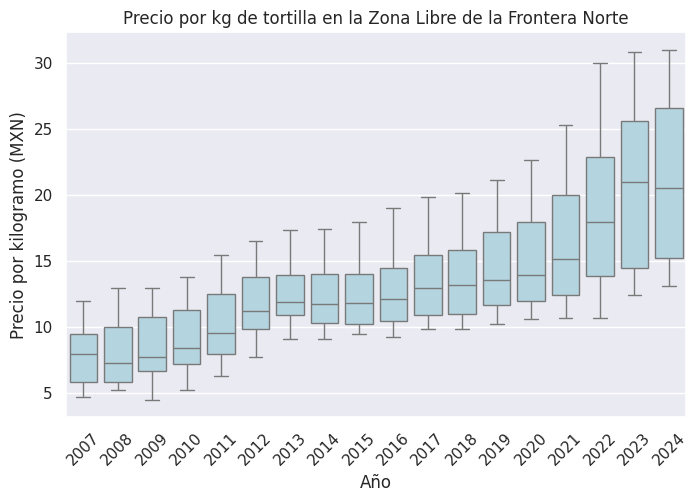

In [ ]:
sns.set(style="white")
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x='Year', y='Price per kilogram', data=grupo_uno, color="lightblue")
plt.title('Precio por kg de tortilla en la Zona Libre de la Frontera Norte')
plt.xlabel('Año')
plt.ylabel('Precio por kilogramo (MXN)')
plt.xticks(rotation=45)
plt.show()

**Análisis:**

*El Boxplot del grupo uno (Zona Libre de la Frontera Norte) muestra la distribución del precio por kg de tortilla entre el período 2007-2024. Se observa una tendencia al alza. Además, la variabilidad en los precios ha ido en aumento, sobre todo a partir del 2019 con la llegada de la pandemia y hasta la actualidad debido a factores políticos, climáticos y económicos.*

*Particularmente, se identifica que en el periodo de 2012-2016  el precio promedio por kg no mostró un aumento significativo, manteniéndose bastante similar durante esos años. Por otro lado, en el periodo de 2022 a 2024 la situación es contraria, pues del 2022 al 2023 el aumento en el precio promedio por kg es de fue de 4.00 MXN aproximadamente.*

## Boxplots del *grupo uno* con filtración de datos

*Se realiza una filtración de datos, esto con el fin de eliminar posibles datos atípicos del data frame del grupo uno.*

In [ ]:
#Rango intercuartilico
iqr_grupo_uno = percentil_75_grupo_uno - percentil_25_grupo_uno

In [ ]:
# Creación de filtros para eliminar datos atípicos

# Filtros superior e inferior del grupo uno
filtro_superior_grupo_uno = grupo_uno['Price per kilogram'] > (percentil_25_grupo_uno - iqr_grupo_uno * 1.5)
filtro_inferior_grupo_uno = grupo_uno['Price per kilogram'] < (percentil_75_grupo_uno + iqr_grupo_uno * 1.5)

In [ ]:
df_filtrado_grupo_uno = grupo_uno[filtro_superior_grupo_uno & filtro_inferior_grupo_uno]

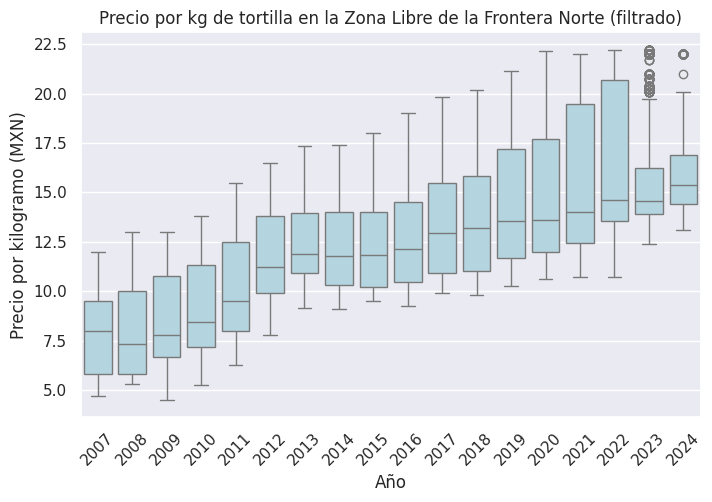

In [ ]:
# Boxplot del grupo uno con los datos filtrados
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x='Year', y='Price per kilogram', data=df_filtrado_grupo_uno, color="lightblue")
plt.title('Precio por kg de tortilla en la Zona Libre de la Frontera Norte (filtrado)')
plt.xlabel('Año')
plt.ylabel('Precio por kilogramo (MXN)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Promedio del precio por kg de tortillas de los datos filtrados del grupo uno
df_filtrado_grupo_uno['Price per kilogram'].mean()

12.265714975029555

In [ ]:
# Mediana del precio por kg de tortillas de los datos filtrados del grupo uno
df_filtrado_grupo_uno['Price per kilogram'].median()

11.95

In [ ]:
# Desviación estándar del precio por kg de tortillas de los datos filtrados del grupo uno
df_filtrado_grupo_uno['Price per kilogram'].std()

3.639820324489094

**Análisis:**

*En el Boxplot del grupo uno con datos filtrados, se observa una reducción de la longitud de los bigotes y una tendencia a la alza de los precios, sugiriendo un incremento sostenido en el costo de las tortillas. A pesar de esta tendencia, el rango intercuartílico mantiene un tamaño relativamente constante con el paso de los años, lo cual indica que la dispersión de los precios por año no ha variado de manera significativa tras la eliminación de outliers.*

*Se observa que, tras filtrar los datos del grupo uno han reducido los valores correspondientes al promedio, mediana y desviación estándar, lo cual es un resultado esperado, dado que se han eliminado las influencias de los valores atípicos y por ende, los valores actualizados son más precisos en la distribución de los datos.*

## Boxplot del *grupo dos* con filtración de datos
*Se realiza una filtración de datos, esto con el fin de eliminar posibles datos atípicos del data frame del grupo dos.*

In [ ]:
#Rango intercuartilico
iqr_grupo_dos = percentil_75_grupo_dos - percentil_25_grupo_dos

In [ ]:
# Creación de filtros para eliminar datos atípicos

# Filtros superior e inferior del grupo dos
filtro_superior_grupo_dos = grupo_dos['Price per kilogram'] > (percentil_25_grupo_dos - iqr_grupo_dos * 2)
filtro_inferior_grupo_dos = grupo_dos['Price per kilogram'] < (percentil_75_grupo_dos + iqr_grupo_dos * 2)

In [ ]:
df_filtrado_grupo_dos = grupo_dos[filtro_superior_grupo_dos & filtro_inferior_grupo_dos]

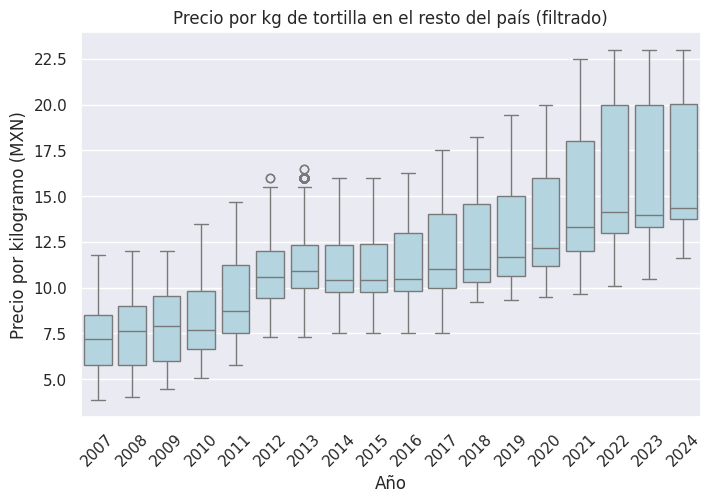

In [ ]:
# Boxplot del grupo dos con los datos filtrados
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x='Year', y='Price per kilogram', data=df_filtrado_grupo_dos, color="lightblue")
plt.title('Precio por kg de tortilla en el resto del país (filtrado)')
plt.xlabel('Año')
plt.ylabel('Precio por kilogramo (MXN)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Promedio del precio por kg de tortillas de los datos filtrados del grupo dos
df_filtrado_grupo_dos['Price per kilogram'].mean()

11.429475573237047

In [ ]:
# Mediana del precio por kg de tortillas de los datos filtrados del grupo dos
df_filtrado_grupo_dos['Price per kilogram'].median()

10.8

In [ ]:
# Desviación estándar del precio por kg de tortillas de los datos filtrados del grupo dos
df_filtrado_grupo_dos['Price per kilogram'].std()

3.65172857861626

**Análisis:**

*En el Boxplot del grupo dos con datos filtrados, se conserva una clara tendencia a la alza en el precio de las tortillas. A pesar del aumento general en los precios, el rango intercuartílico mantiene un tamaño relativamente constante a lo largo de los años, sugiriendo que la variabilidad de los precios dentro de cada año se mantiene estable.*

*En cuanto a la diferencia del promedio, mediana y desviación estándar del grupo dos tras haber sido filtrado, se nota que por un lado, el valor del promedio y la mediana disminuyeron ligeramente, lo cual indica que los valores atípicos que fueron eliminados eran más altos que el promedio de los datos, por lo cual, desplazaron ligeramente hacia abajo los valores centrales. Por otro lado, la desviación estándar disminuyó de manera notable, sugiriendo que los datos se han vuelto menos dispersos luego de ser filtrados.*

**Para fines prácticos del proyecto, se utilizarán los data frame de cada grupo sin filtrar para la visualización de datos, esto debido a que los análisis con el filtro de los valores se ven considerablemente disminuidos y no porporcionan un precio puntual del kilogramo de tortilla, parte del proyecto consiste en observar todos los patrones de precios que puedan surgir en cada periodo y que se vieron afectados por alguna situación política, social, económica, ambiental, etc. de la zona de estudio.**

## Tablas de frecuencia

*Se realiza una segmentación de los datos en grupos del mismo tamaño, para la identificación de intervalos de precio por año documentado.*

## *Grupo uno sin filtración de datos*

In [ ]:
# Creación de intervalos de precios
grupo_uno['Price_interval'] = pd.cut(grupo_uno['Price per kilogram'], bins=10)

# Creación de una tabla con la función 'crosstab', que nos permite analizar la relación entre el año y el intervalo de precio, facilitando la identificación de patrones y tendencias en los datos.
tabla_frecuencias_grupo_uno = pd.crosstab(grupo_uno['Year'], grupo_uno['Price_interval'])
print(tabla_frecuencias_grupo_uno)

<ipython-input-45-af776cda3bda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo_uno['Price_interval'] = pd.cut(grupo_uno['Price per kilogram'], bins=10)


Price_interval  (4.474, 7.15]  (7.15, 9.8]  (9.8, 12.45]  (12.45, 15.1]  \
Year                                                                      
2007                     2467         1515           964              0   
2008                     2432         1112          1302             18   
2009                     1990         1108          1428            146   
2010                     1164         1369          1937            298   
2011                      157         2245           962           1215   
2012                        0         1131          2062           1977   
2013                        0           33          3059           1880   
2014                        0          185          2840           1967   
2015                        0           93          2622           2072   
2016                        0           43          2659           1976   
2017                        0            0          2521            958   
2018                     

In [ ]:
# La segmentación por grupos, nos permite agrupar nuestros datos por rango de precio y como resultado, dice cuantás tiendas se encuentran en este segmento.

segmentos_grupo_uno = pd.cut(grupo_uno['Price per kilogram'], 10)
grupo_uno['Price per kilogram'].groupby(segmentos_grupo_uno).count()

<ipython-input-46-9f41c9b26dab>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_uno['Price per kilogram'].groupby(segmentos_grupo_uno).count()


Price per kilogram
(4.474, 7.15]     8210
(7.15, 9.8]       8834
(9.8, 12.45]     29542
(12.45, 15.1]    19798
(15.1, 17.75]     9747
(17.75, 20.4]     4497
(20.4, 23.05]     2798
(23.05, 25.7]     2395
(25.7, 28.35]     1317
(28.35, 31.0]     1156
Name: Price per kilogram, dtype: int64

**Análisis:**

*Las tablas del grupo uno muestran la frecuencia de precios por kilogramo de tortilla en México entre los años 2007-2024, esto en intervalos para cada año. Esta permite identificar la concentración de precios en diferentes rangos y como esta concentración cambia a lo largo de los años.*

## *Grupo dos sin filtración de datos*

In [ ]:
# Creación de intervalos de precios
grupo_dos['Price_interval'] = pd.cut(grupo_dos['Price per kilogram'], bins=10)

# Creación de una tabla con la función 'crosstab', que nos permite analizar la relación entre el año y el intervalo de precio,
# facilitando la identificación de patrones y tendencias en los datos.

tabla_frecuencias_grupo_dos = pd.crosstab(grupo_dos['Year'], grupo_dos['Price_interval'])
print(tabla_frecuencias_grupo_dos)

<ipython-input-47-10ad0d4cdc32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo_dos['Price_interval'] = pd.cut(grupo_dos['Price per kilogram'], bins=10)


Price_interval  (-0.0295, 2.95]  (2.95, 5.9]  (5.9, 8.85]  (8.85, 11.8]  \
Year                                                                      
2007                          0         5326         3958          1894   
2008                          0         4920         3030          2834   
2009                          1         2504         4468          3338   
2010                          0          949         5627          3481   
2011                          0           33         5523          3141   
2012                          0            0         1412          6702   
2013                          0            0          449          7297   
2014                          0            0          332          7689   
2015                          0            0          342          7526   
2016                          0            0          282          7091   
2017                          0            0           14          5912   
2018                     

In [ ]:
# La segmentación por grupos, nos permite agrupar nuestros datos por rango de precio y como resultado, dice cuantás tiendas se encuentran en este segmento.

segmentos_grupo_dos = pd.cut(grupo_dos['Price per kilogram'], 10)
grupo_dos['Price per kilogram'].groupby(segmentos_grupo_dos).count()

<ipython-input-48-2fc4b17b952f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_dos['Price per kilogram'].groupby(segmentos_grupo_dos).count()


Price per kilogram
(-0.0295, 2.95]        1
(2.95, 5.9]        13732
(5.9, 8.85]        25437
(8.85, 11.8]       74365
(11.8, 14.75]      42842
(14.75, 17.7]      16528
(17.7, 20.65]       7092
(20.65, 23.6]       5333
(23.6, 26.55]       3517
(26.55, 29.5]        863
Name: Price per kilogram, dtype: int64

**Análisis:**

*Las tablas del grupo dos muestran la frecuencia de precios por kilogramo de tortilla en México entre los años 2007-2024, esto en intervalos para cada año. Esta permite identificar la concentración de precios en diferentes rangos y como esta concentración cambia a lo largo de los años.*

## Histogramas

Visualización del dataset mediante el uso de histogramas

### *Histogramas grupo uno*

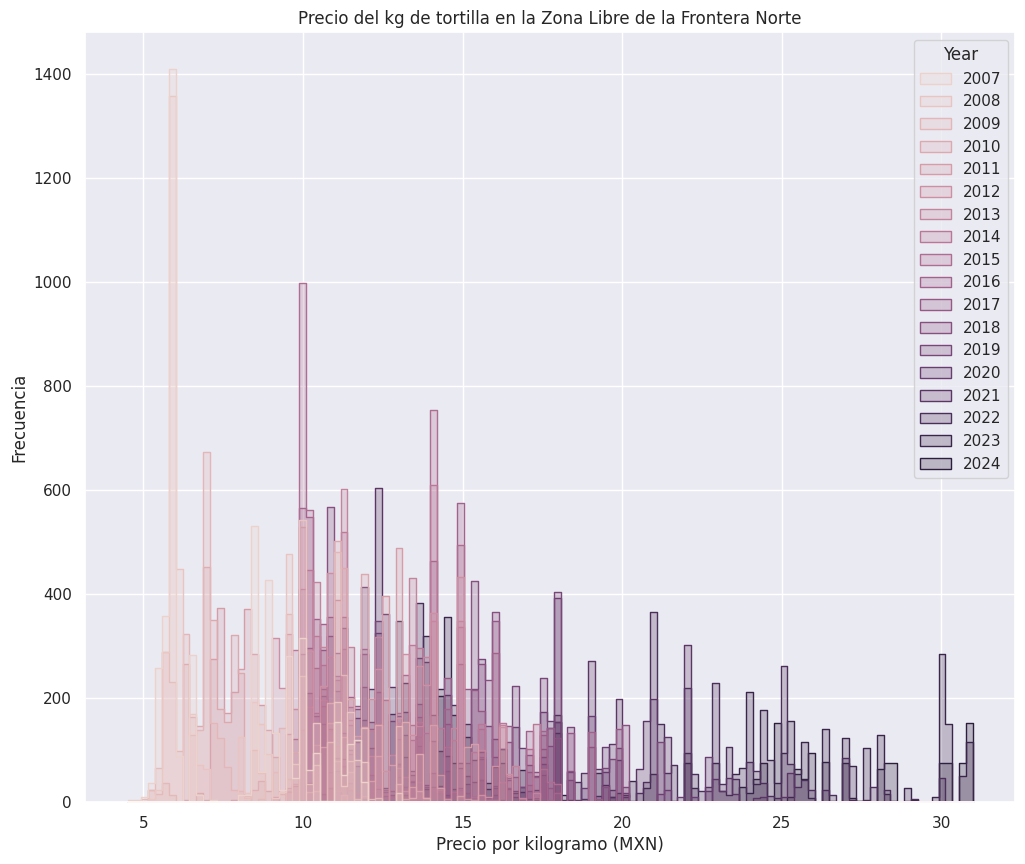

In [ ]:
plt.figure(figsize=(12, 10))  # Ajuste de tamaño
sns.histplot(data=grupo_uno, x='Price per kilogram', hue='Year', element='step', common_norm=False)
plt.title('Precio del kg de tortilla en la Zona Libre de la Frontera Norte')
plt.xlabel('Precio por kilogramo (MXN)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Histograma interactivo

import plotly.express as px
fig = px.histogram(grupo_uno, x='Price per kilogram', color='Year', barmode='group',
                   nbins=50,
                   hover_data=grupo_uno.columns,
                   title='Precio del kg de tortilla en la Zona Libre de la Frontera Norte')
fig.show()

In [ ]:
# El sesgo de los datos es representado por el valor de skew:

from scipy.stats import skew, kurtosis
sesgo_grupo_uno = skew(grupo_uno['Price per kilogram'])
print(f"Sesgo del grupo uno: {sesgo_grupo_uno}")

Sesgo del grupo uno: 1.1537959549354546


In [ ]:
# Para conocer cómo se caracterizan las distribuciones del grupo uno respecto la distribución normal, empleamos la curtosis.

kurtosis_grupo_uno = kurtosis(grupo_uno['Price per kilogram'])
print(f"Curtosis del grupo uno: {kurtosis_grupo_uno}")

Curtosis del grupo uno: 1.7055378998319135


**Análisis:**

*Al paso de los años, la distribución de los precios se desplaza hacia la derecha, lo cual indica una tendencia general a la alza en el precio por kg de tortillas en el grupo uno. En años recientes observamos una mayor concentración de precios en los rangos más elevados, es decir, no solo ha aumentado el promedio del precio, sino que la cantidad de establecimientos con precios bajos disminuyó. Cabe destacar que, a pesar de la tendencia alcista, la variabilidad en los precios cada año sigue presente. Por último, la presencia de picos en la frecuencia de ciertos rangos de precios puede indicar la existencia de precios preferenciales o puntos de equilibrio en el mercado.*

*El sesgo de 1.1672 indica que los datos de concentran principalmente en la parte inferior de la distribución y una cola larga hacia la derecha. Por otra parte, una curtosis de 1.7190 sugiere que la distribución es más plana y con cola menos pesada que una distribución normal, por lo cual hay menor probabilidad de encontrar valores extremos. En base lo anterior, el grupo uno tiene una distribución asimétrica con una cola derecha más larga.*

### *Histogramas grupo dos*

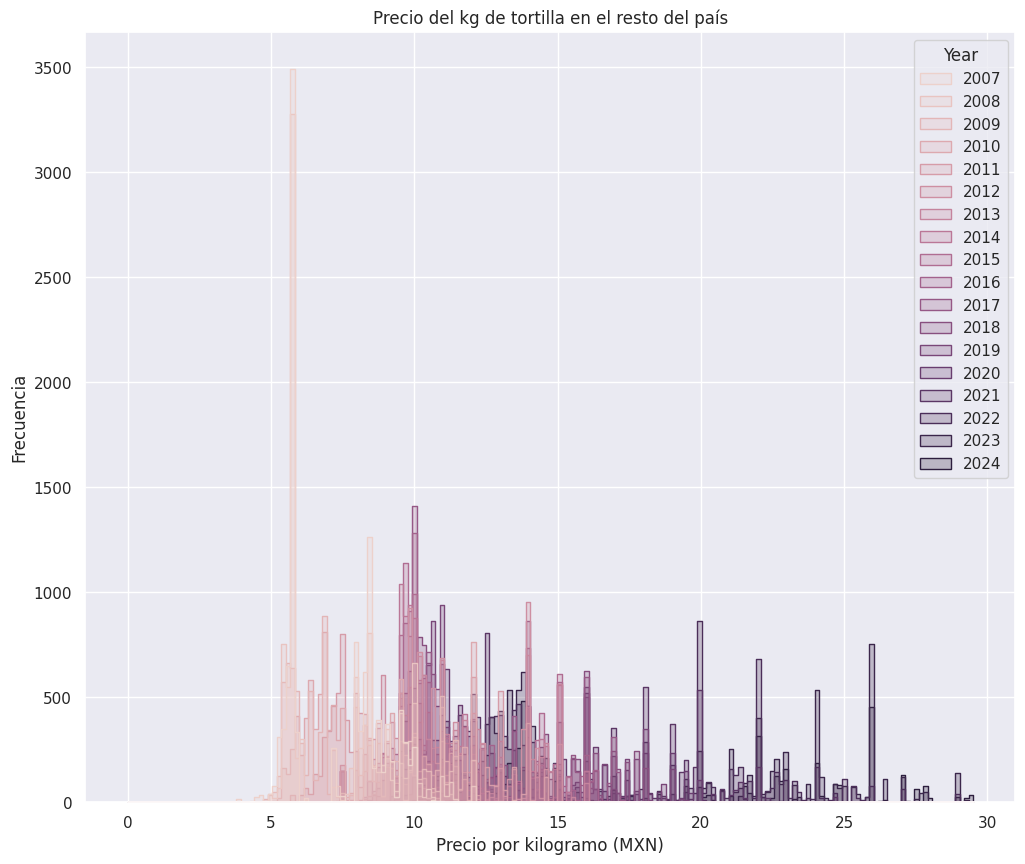

In [ ]:
plt.figure(figsize=(12, 10))  # Ajuste de tamaño
sns.histplot(data=grupo_dos, x='Price per kilogram', hue='Year', element='step', common_norm=False)
plt.title('Precio del kg de tortilla en el resto del país')
plt.xlabel('Precio por kilogramo (MXN)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Histograma interactivo

fig = px.histogram(grupo_dos, x='Price per kilogram', color='Year', barmode='group',
                   nbins=50,
                   hover_data=grupo_dos.columns,
                   title='Precio del kg de tortilla en el resto del país')
fig.show()

In [ ]:
# El sesgo de los datos es representado por el valor de skew:

sesgo_grupo_dos = skew(grupo_dos['Price per kilogram'])
print(f"Sesgo del grupo dos: {sesgo_grupo_dos}")

Sesgo del grupo dos: 1.1746674557680539


In [ ]:
# Para conocer cómo se caracterizan las distribuciones del grupo dos respecto la distribución normal, empleamos la curtosis.

kurtosis_grupo_dos = kurtosis(grupo_dos['Price per kilogram'])
print(f"Curtosis del grupo dos: {kurtosis_grupo_dos}")

Curtosis del grupo dos: 1.8200205266585279


**Análisis:**

*Al paso de los años, la distribución para los datos del grupo dos se desplazan hacia la derecha, indicando un aumento general en los precios. Se observa una gran variabilidad en los precios dentro de cada año y a lo largo del tiempo, además de picos en la frecuencia de ciertos rangos de precios, lo cual podría representar la existencia de precios preferenciales o puntos de equilibrio en el mercado.*

*El sesgo de 1.20 indica que la distribución está sesgada hacia la derecha, lo cual significa que se observan más "precios bajos" y menos observaciones de precios extremadamente altos. Por otro lado, la curtosis de 1.96 indica que los datos están menos concentrados alrededor de la media y hay una menor probabilidad de encontrar valores extremos. Por lo anterior, se deduce que la distribución del precio por kg de las tortillas para el grupo dos es asimétrica, con una cola derecha más larga, así como que la distribución es más plana que una distribución normal.*

## Gráficas de densidad

### *Gráfica de densidad grupo uno*

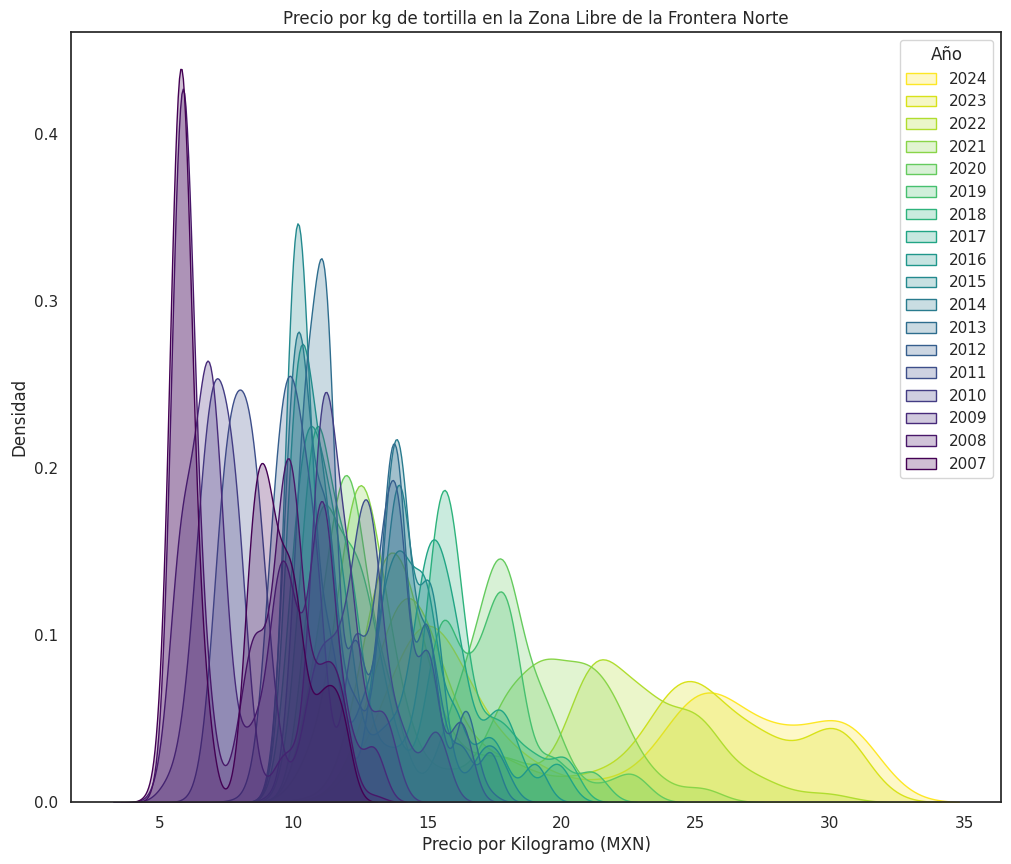

In [ ]:
sns.set(style="white")

# Ajuste del tamaño de la gráfica
plt.figure(figsize=(12, 10))

# Gráficas de densidad con el año como variable de agrupación (hue)
sns.kdeplot(data=grupo_uno, x='Price per kilogram', hue='Year', fill=True, common_norm=False, palette='viridis')
years = grupo_uno['Year'].unique()[::-1]

# Creación de etiquetas
labels = [f'{year}' for year in years]

plt.legend(title='Año', labels=labels, loc='upper right')
plt.title('Precio por kg de tortilla en la Zona Libre de la Frontera Norte')
plt.xlabel('Precio por Kilogramo (MXN)')
plt.ylabel('Densidad')

plt.show()

### *Gráfica de densidad grupo dos*

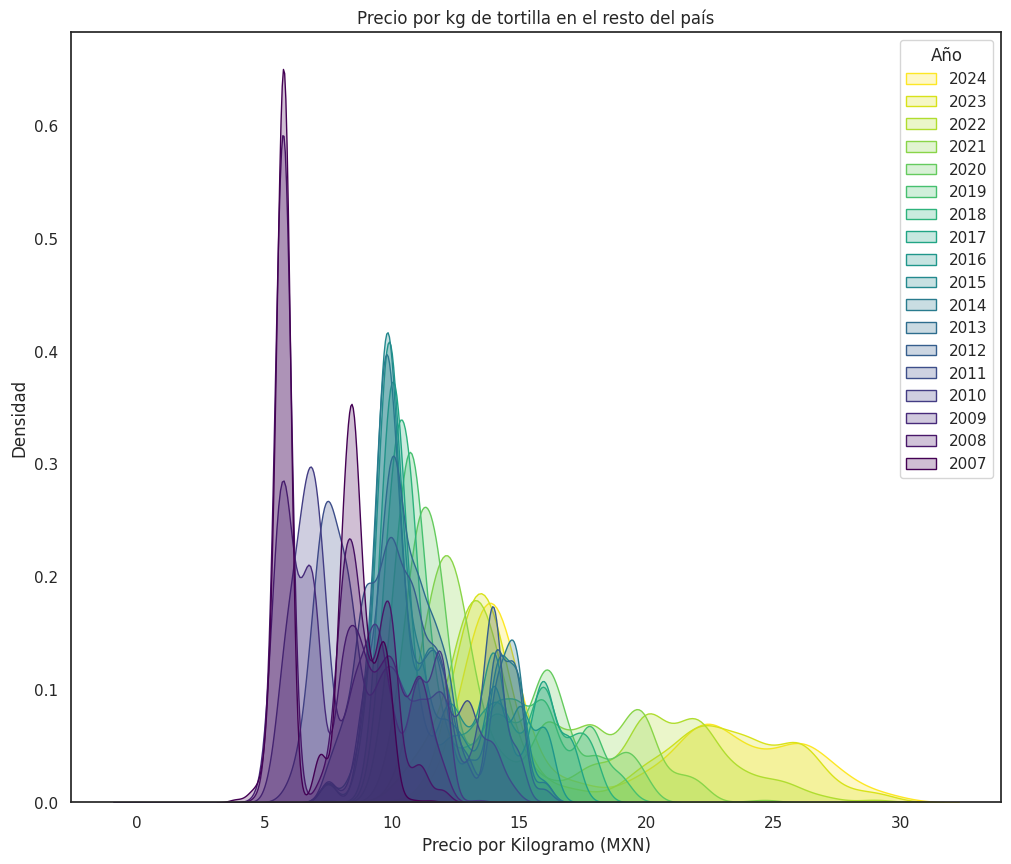

In [ ]:
sns.set(style="white")

# Ajuste del tamaño de la gráfica
plt.figure(figsize=(12, 10))

# Gráficas de densidad con el año como variable de agrupación (hue)
sns.kdeplot(data=grupo_dos, x='Price per kilogram', hue='Year', fill=True, common_norm=False, palette='viridis')
years = grupo_dos['Year'].unique()[::-1]

# Creación de etiquetas
labels = [f'{year}' for year in years]

plt.legend(title='Año', labels=labels, loc='upper right')
plt.title('Precio por kg de tortilla en el resto del país')
plt.xlabel('Precio por Kilogramo (MXN)')
plt.ylabel('Densidad')

plt.show()

**Análisis:**

*En el caso de las gráficas de densidad para ambos grupos, se encontraron precios a la alza con el paso de los años, pero en estos casos, la variabilidad de los mismos se refleja en la amplitud de cada curva, donde precisamente se identifica que, en algunos años las curvas son simétricas mientras que otras presentan mayor asimetría, indicando así cambios en la concentración de los precios. Por otro lado, la existencia de precios "preferenciales" o puntos de equilibrio en el mercado se identifican a través de los picos y valles de las curvas.*

## 3. Exploración de Variables Categóricas y Análisis Multivariable

#**Gráficos de barras para las variables categóricas.**



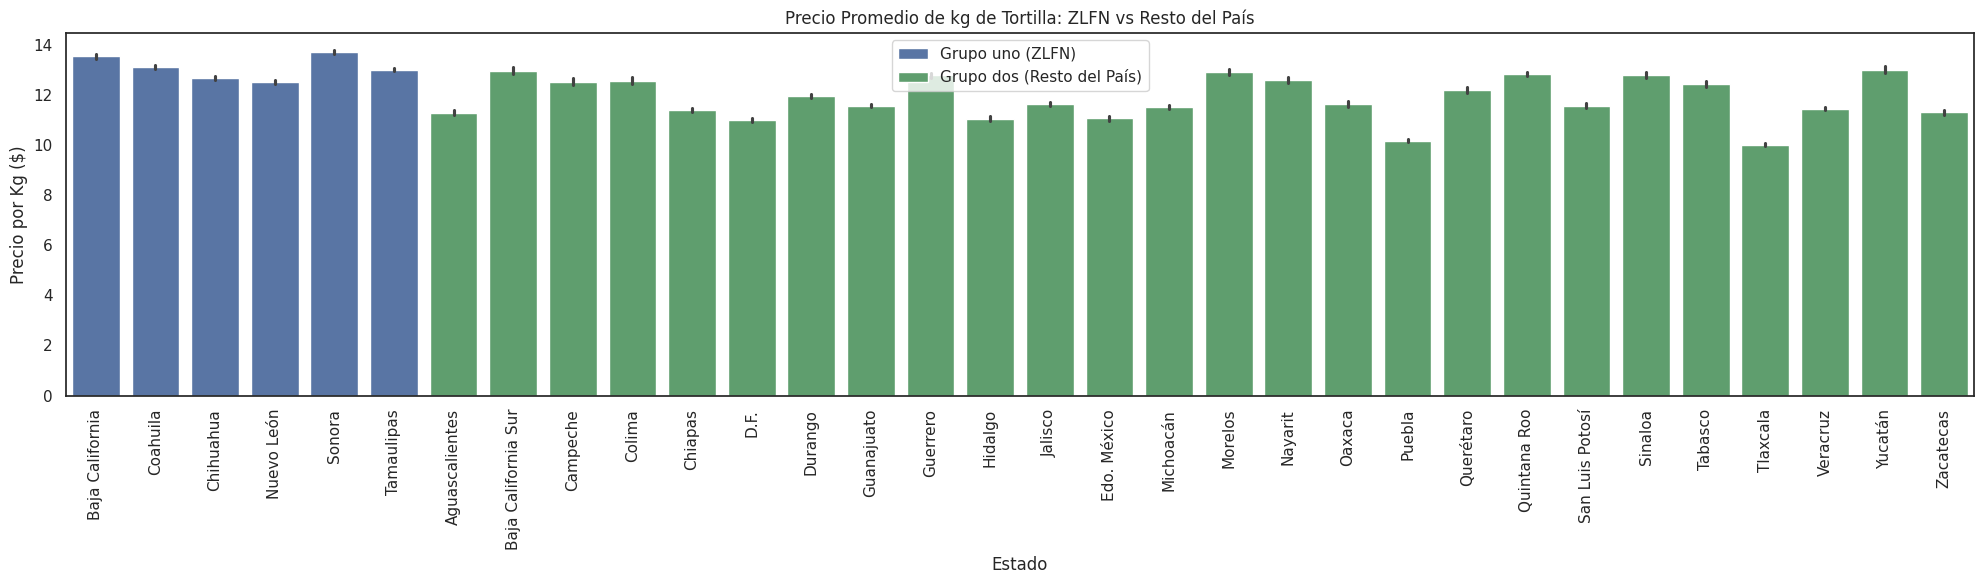

In [ ]:
# Gráfica de Barras: Precio promedio por kilogramo para cada grupo
plt.figure(figsize=(20, 6))
sns.barplot(data=grupo_uno, x='State', y='Price per kilogram', color='b', label='Grupo uno (ZLFN)')
sns.barplot(data=grupo_dos, x='State', y='Price per kilogram', color='g', label='Grupo dos (Resto del País)')
plt.xticks(rotation=90)
plt.title('Precio Promedio de kg de Tortilla: ZLFN vs Resto del País')
plt.xlabel('Estado')
plt.ylabel('Precio por Kg ($)')
plt.legend()
plt.tight_layout()
plt.show()

**Análisis:**

*Se observa que, en general, los precios promedio de la tortilla tienden a ser ligeramente más altos en la Zona Libre de la Frontera Norte en comparación con el resto del País. Esto se evidencia al comparar la altura de las barras azules (ZLFN) con las verdes (Resto del País).*

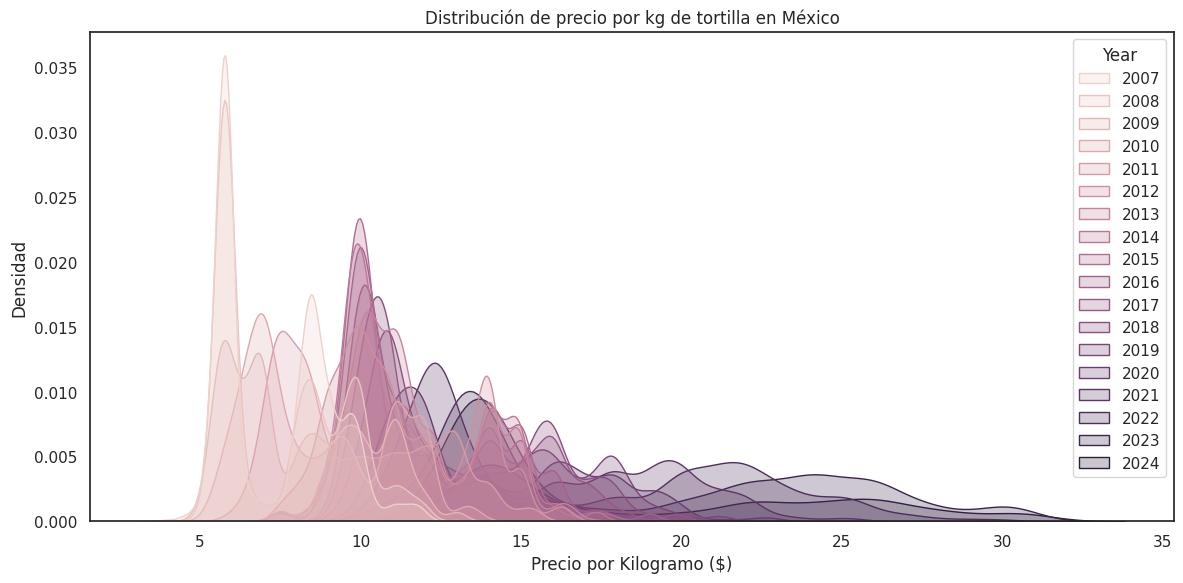

In [ ]:
# Gráfica de densidad: 'Price per kilogram' vs 'Grupo'
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Price per kilogram', hue='Year', fill=True)
plt.title('Distribución de precio por kg de tortilla en México')
plt.xlabel('Precio por Kilogramo ($)')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

**Análisis:**

*Las curvas de densidad revelan que la distribución de los precios en ambos grupos es asimétrica, con una mayor concentración de precios en los rangos bajos y medios. Sin embargo, la curva de la Zona Libre de la Frontera Norte está ligeramente desplazada hacia la derecha, indicando que en esta zona hay una mayor probabilidad de encontrar precios más altos.*

#**Tablas de contingencia**

*Se realiza una tabla de contingencia para los conteos de frecuencia respecto al rango de precio por kilogramo de tortilla en México.*

In [ ]:
import pandas as pd
from IPython.display import display

# Definir los rangos y etiquetas para los precios en pesos mexicanos
bins = [0, 9, 16, 24, 32, float('inf')]
labels = ['Bajo ($0-$9)', 'Medio Bajo ($10-$16)', 'Medio ($17-$24)', 'Alto ($25-$32)', 'Muy Alto (>$32)']

# Crear una nueva columna en el DataFrame con los precios categorizados
df['Price Category'] = pd.cut(df['Price per kilogram'], bins=bins, labels=labels, right=False)

# Assuming 'Grupo' column exists with values like 'ZLFN' and 'Resto del País'
# Crear la tabla de contingencia con los grupos deseados
tabla_contingencia_precio_grupo = pd.crosstab(df['Price Category'], df['Grupo'], margins=True)  # Corrected line

# Mostrar la tabla con el formato adecuado
print("Tabla de Contingencia de Precio por Categoría entre Grupos (ZLFN vs Resto del País):")
display(tabla_contingencia_precio_grupo.style.format(precision=2).set_properties(**{'background-color': '#f0f0f0', 'border': '1px solid black'}))

<ipython-input-60-0020e7e43c7d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tabla de Contingencia de Precio por Categoría entre Grupos (ZLFN vs Resto del País):


*Se realiza un countplot complementario a la tabla de contingencia, en este se muestra la frecuencia de observaciones para cada rango de precio de la tortilla ('Bajo', 'Medio Bajo', 'Medio', 'Alto') dentro de cada grupo ('ZLFN' y 'Resto del País').*

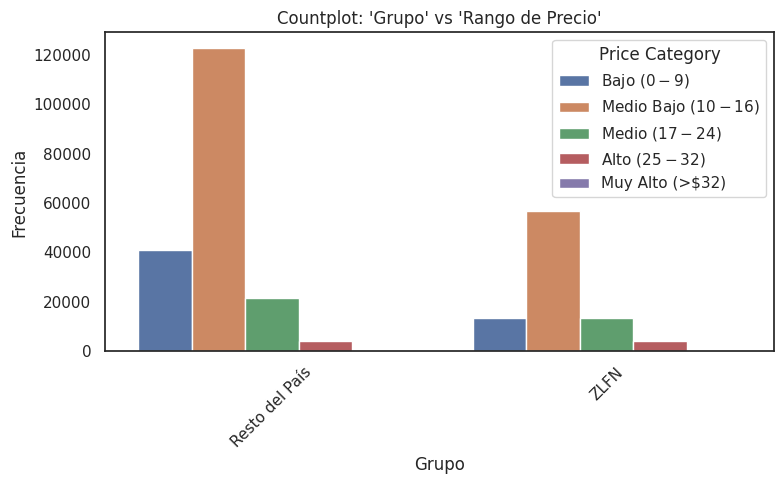

In [ ]:
# Countplot: 'Grupo' vs 'Rango de Precio'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Grupo', hue='Price Category')
plt.title("Countplot: 'Grupo' vs 'Rango de Precio'")
plt.xlabel('Grupo')
plt.ylabel('Frecuencia') # se refiere al número de veces que se observan los distintos rangos de precios dentro de cada grupo ('Resto del País' y 'ZLFN'). En otras palabras, la frecuencia muestra cuántas observaciones existen para cada rango de precios en cada grupo.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  # Mostrar la figura

# **Boxplots y violinplots.**

*Para la exploración de combinaciones de variables numéricas con variables categóricas.*

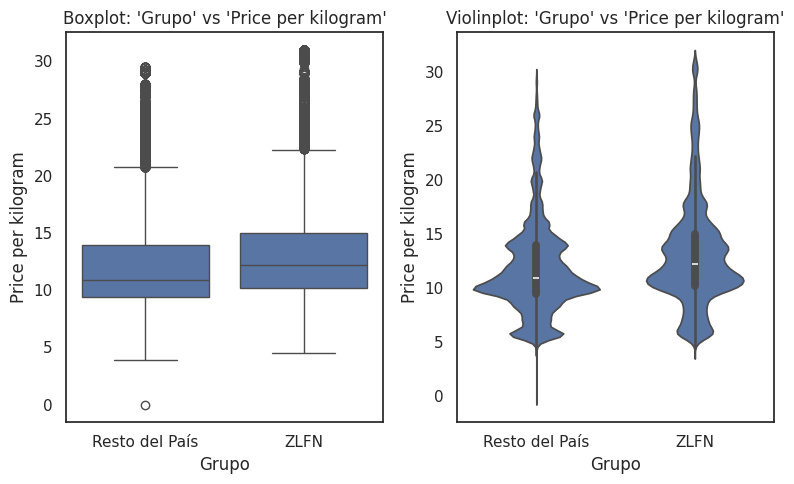

In [ ]:
# Boxplots y Violinplots para explorar combinaciones de variables numéricas con variables categóricas
fig, axes = plt.subplots(1, 2, figsize=(8, 5))  # Crear una figura con 2 subgráficos

# Boxplot: 'Price per kilogram' vs 'Grupo'
sns.boxplot(data=df, x='Grupo', y='Price per kilogram', ax=axes[0])
axes[0].set_title("Boxplot: 'Grupo' vs 'Price per kilogram'")
axes[0].set_xlabel('Grupo')
axes[0].set_ylabel('Price per kilogram')

# Violinplot: 'Price per kilogram' vs 'Grupo'
sns.violinplot(data=df, x='Grupo', y='Price per kilogram', ax=axes[1])
axes[1].set_title("Violinplot: 'Grupo' vs 'Price per kilogram'")
axes[1].set_xlabel('Grupo')
axes[1].set_ylabel('Price per kilogram')

plt.tight_layout()
plt.show()

**Análisis:**

*Estos gráficos refuerzan la idea de una distribución asimétrica, mostrando la presencia de algunos valores atípicos (outliers) con precios muy altos, especialmente en el grupo ZLFN. Los violinplots también nos permiten apreciar la mayor densidad de precios en los rangos bajos y medios para cada uno de los grupos.*

#**Sesion 6:Visualziación de Datos avanzada**

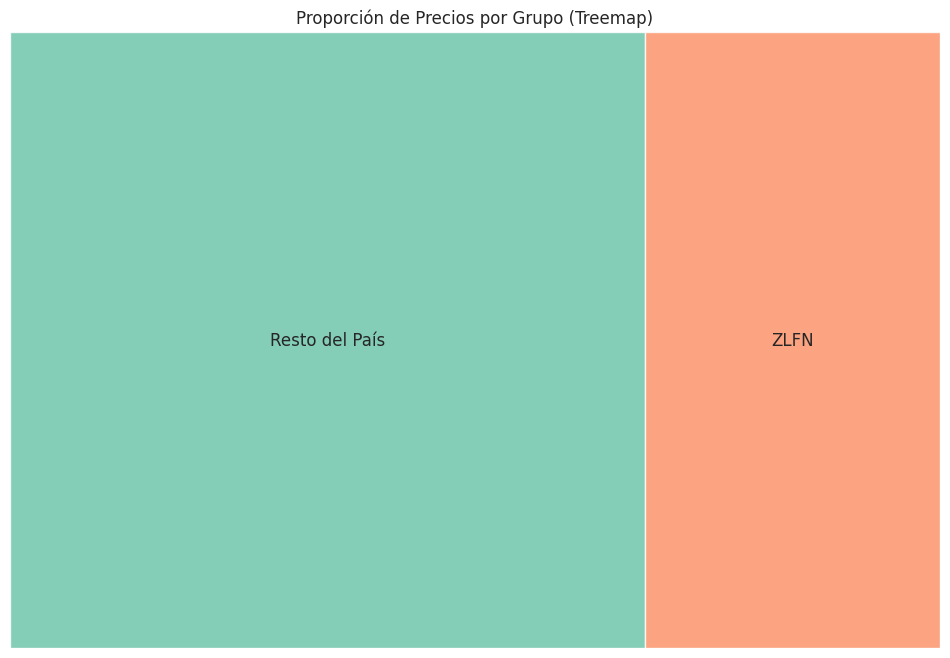

In [ ]:
# Treemap para explorar proporciones de precios por grupo
!pip install squarify
import squarify

# Agrupar los datos
group_counts = df.groupby('Grupo')['Price per kilogram'].count()

# Crear la figura de Treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=group_counts.values, label=group_counts.index, alpha=0.8, color=['#66c2a5', '#fc8d62'])
plt.title('Proporción de Precios por Grupo (Treemap)')
plt.axis('off')
plt.show()

# Scatterplot para la relación entre 'Price per kilogram' y 'Grupo'


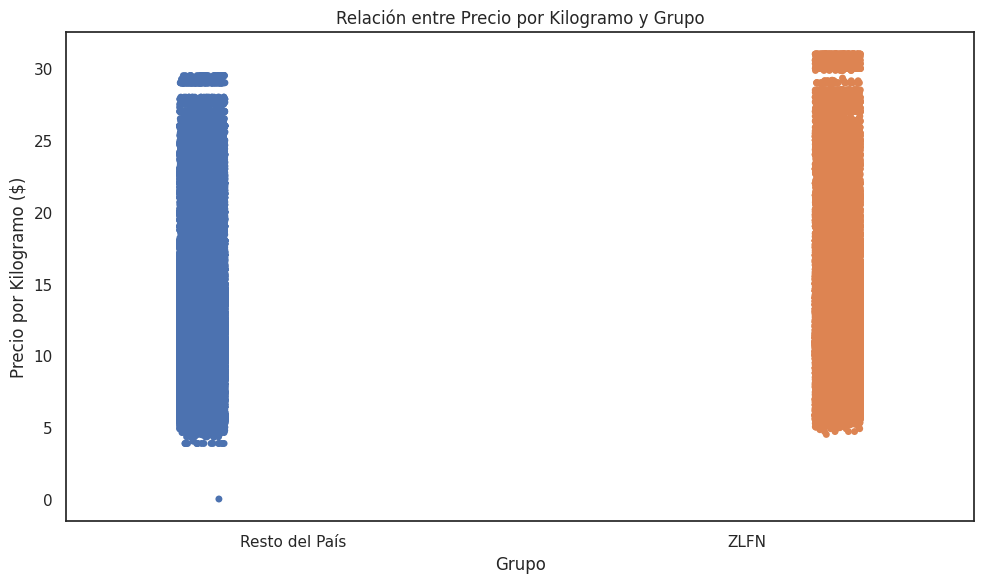

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Grupo', y='Price per kilogram', jitter=True, hue='Grupo', dodge=True)
plt.title('Relación entre Precio por Kilogramo y Grupo')
plt.xlabel('Grupo')
plt.ylabel('Precio por Kilogramo ($)')
plt.tight_layout()
plt.show()

<ipython-input-71-27736deb64b7>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



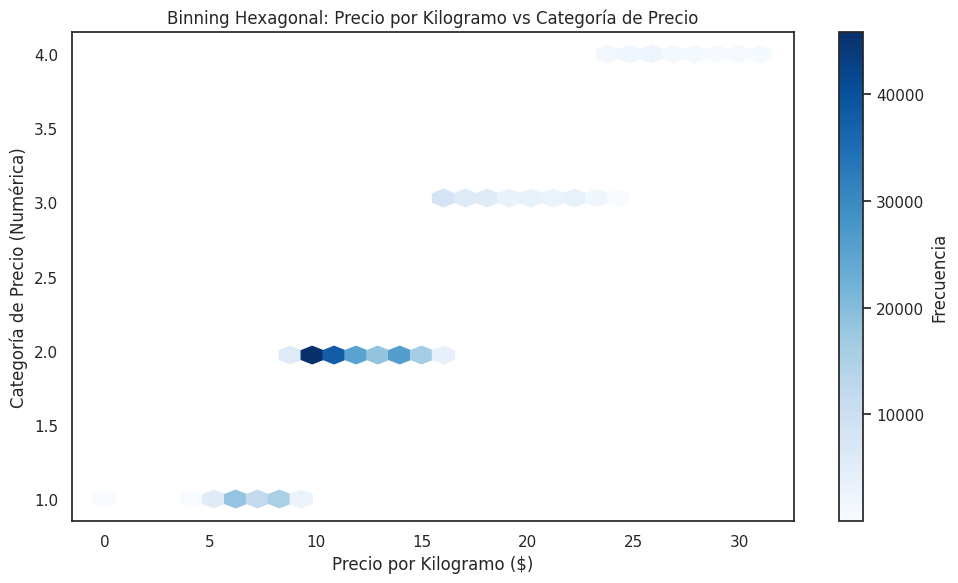

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un mapeo numérico para cada categoría
price_category_mapping = {
    'Bajo ($0-$9)': 1,
    'Medio Bajo ($10-$16)': 2,
    'Medio ($17-$24)': 3,
    'Alto ($25-$32)': 4,
    'Muy Alto (>$32)': 5
}

# Asignar los valores numéricos a una nueva columna
df['Price Category Numeric'] = df['Price Category'].map(price_category_mapping)

# Ahora usar la nueva columna numérica en el gráfico hexbin
plt.figure(figsize=(10, 6))
plt.hexbin(df['Price per kilogram'], df['Price Category Numeric'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Frecuencia')
plt.title('Binning Hexagonal: Precio por Kilogramo vs Categoría de Precio')
plt.xlabel('Precio por Kilogramo ($)')
plt.ylabel('Categoría de Precio (Numérica)')
plt.tight_layout()
plt.show()



# **Sesión 4: correlaciones y regresión lineal**

*En este apartado se explora la relación entre las variables numéricas de la base de datos, esto para identificar si existe o no una correlación fuerte entre ellas.*

In [ ]:
#1.Indetificar variables númericas:
#Day
#Price per kilogram
#Year

*Se hace uso de las variables: 'Price per kilogram' y 'Year' para análisis posteriores de correlación, ya que ambos son punto importante de estudio en el proyecto y proporcionarán información valiosa.*

# **Matriz de correlaciones**

*Una matriz de este tipo, representa las correlaciones que existen entre variables, para poder identificar si son variables dependientes o independientes una de la otra.*

# *Grupo 1*

In [ ]:
#Borrar columnas categoricas
df_g1=grupo_uno.drop(columns=['State','City','Store type','Day', 'Month', 'Price_interval'])
df_g1.head()

Year  Price per kilogram
2   2007                10.0
5   2007                10.0
10  2007                10.0
27  2007                 9.8
37  2007                10.4

In [ ]:
#matriz de corrleaciones grupo 1
df_g1.corr()

Year  Price per kilogram
Year                1.000000            0.726002
Price per kilogram  0.726002            1.000000

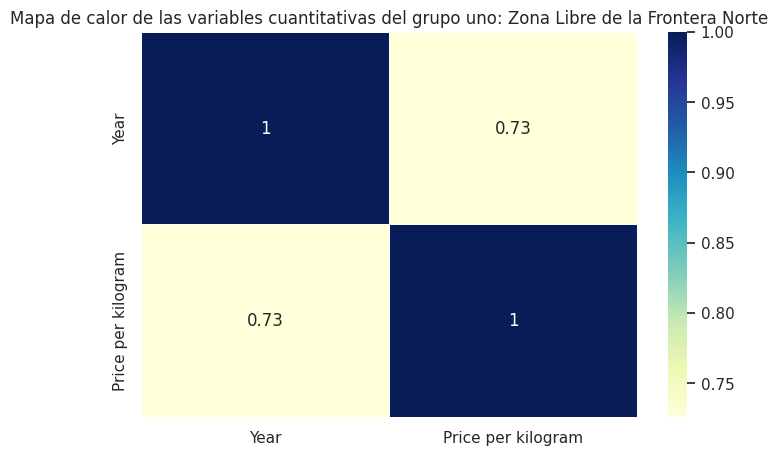

In [ ]:
#Mapa de calor
heatmap_g1=sns.heatmap(df_g1.corr(), annot=True, cmap="YlGnBu", linewidths=0.5, linecolor="white")

heatmap_g1.set(title="Mapa de calor de las variables cuantitativas del grupo uno: Zona Libre de la Frontera Norte");

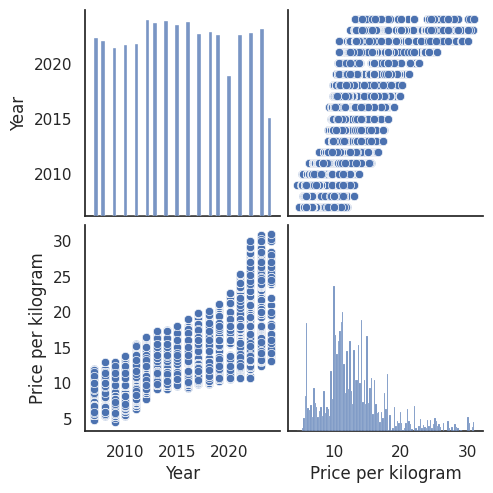

In [ ]:
#pairplot grupo 1
pairplot=sns.pairplot(df_g1);

**Análisis:**

*Se observó una fuerte correlación positiva entre el año y el precio del kilogramo de tortilla (0.73) en el grupo uno, lo que indica que el precio tiende a aumentar con el tiempo.  El diagrama de dispersión confirmó la correlación positiva entre el año y el precio del kilogramo de tortilla. No se identificaron valores atípicos significativos.*

# *Grupo 2*

In [ ]:
#Borrar columnas
df_g2=grupo_dos.drop(columns=['State','City','Store type', 'Month', 'Day', 'Price_interval'])

In [ ]:
#matriz de corrleaciones grupo 2
df_g2.corr()

Year  Price per kilogram
Year                1.000000            0.722818
Price per kilogram  0.722818            1.000000

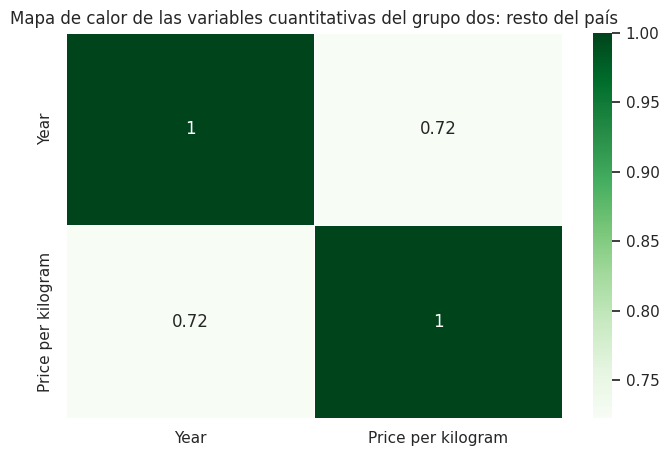

In [ ]:
#Mapa de calor
heatmap_g2=sns.heatmap(df_g2.corr(), annot=True, cmap="Greens", linewidths=0.5, linecolor="white")
heatmap_g2.set(title="Mapa de calor de las variables cuantitativas del grupo dos: resto del país");

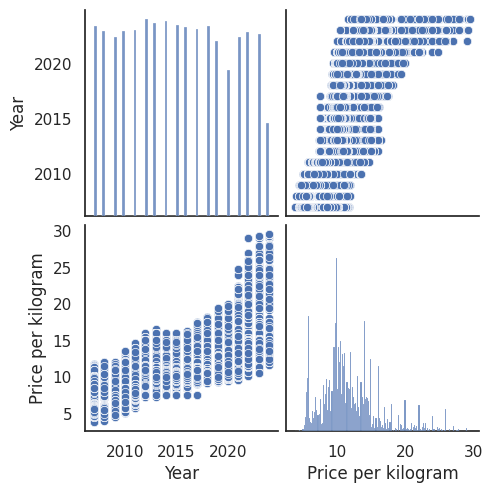

In [ ]:
#pairplot grupo 2
sns.pairplot(df_g2);

**Análisis:**

*Se encontró una correlación positiva similar entre el año y el precio del kilogramo de tortilla (0.72), aunque ligeramente menor que en el grupo uno. El diagrama de dispersión también mostró una correlación positiva entre el año y el precio del kilogramo de tortilla en este grupo.*

**En la siguiente sección veremos el cálulo del coeficiente de correlación de Pearson para comprobar nuestra hipotesis.**

# **Diagramas de dispersión**

# *Grupo 1*

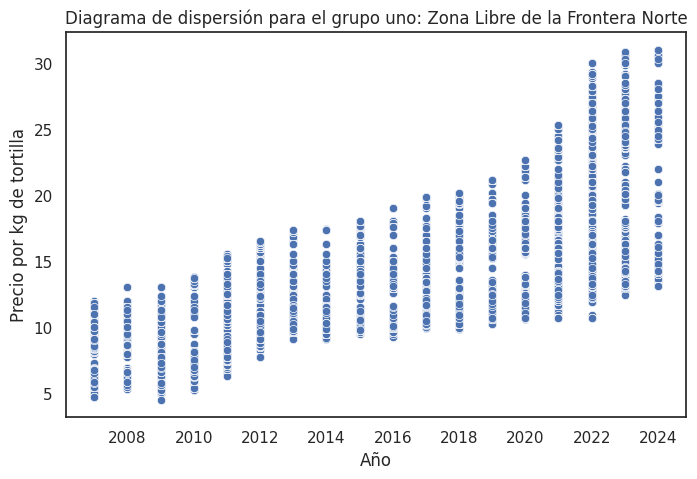

In [ ]:
#Diagrama de dispersión de precio de las tortilla y del año para el grupo 1
g_1=sns.scatterplot(data=grupo_uno, x='Year', y='Price per kilogram');

#Titulo
g_1.set(title="Diagrama de dispersión para el grupo uno: Zona Libre de la Frontera Norte", xlabel="Año", ylabel="Precio por kg de tortilla");

#configurar eje x
g_1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

Para el diagrama de dispersión del grupo uno no se encontraron valores atípicos

In [ ]:
#coeficiente de correlación de Pearson grupo uno
grupo_uno['Year'].corr(grupo_uno['Price per kilogram'])

0.7260024749248485

**Análisis:**

*El diagrama de dispersión mostró y confirmó una correlación positiva entre el año y el precio del kilogramo de tortilla en este grupo. El cálculo del coeficiente de correlación de Pearson nos comprueba que existe una relación fuerte positiva entre el año y el precio de las tortillas para el grupo uno.*

# *Grupo 2*

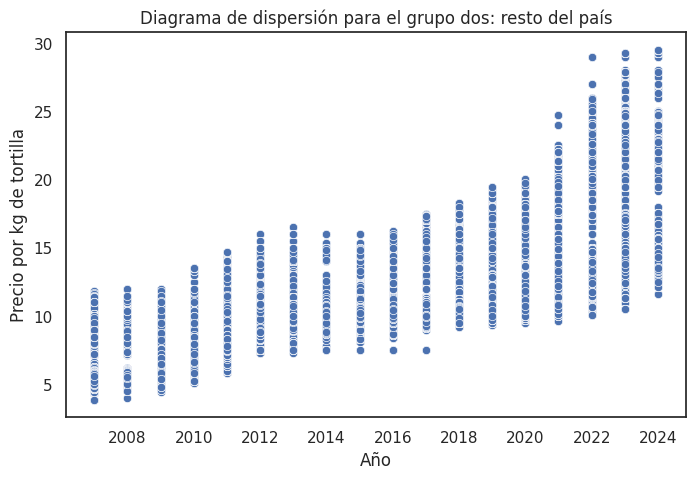

In [ ]:
#Diagrama de dispersión de precio de las tortilla y del año para el grupo 2
g_2=sns.scatterplot(data=grupo_dos, x='Year', y='Price per kilogram');

#Titulo
g_2.set(title="Diagrama de dispersión para el grupo dos: resto del país", xlabel="Año", ylabel="Precio por kg de tortilla");

#configurar eje x
g_2.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

In [ ]:
#coeficiente de correlación de Pearson grupo 2
grupo_dos['Year'].corr(grupo_dos['Price per kilogram'])

0.7228183607663772

**Análisis:**

*El diagrama de dispersión mostró y confirmó una correlación positiva entre el año y el precio del kilogramo de tortilla en este grupo. El cálculo del coeficiente de correlación de Pearson nos comprueba que existe una relación fuerte positiva entre el año y el precio de las tortillas para el grupo dos.*

# **Modelo de regresión lineal**

*¿Se puede predecir el precio por kilogramo de tortilla para años futuros?*

In [ ]:
#Importaciones
from sklearn.linear_model import LinearRegression

# *Grupo 1*

In [ ]:
#Grupo 1 modelo de regresión lineal
lr=LinearRegression()

#Entrenamiento del modelo
lr.fit(grupo_uno['Year'].to_frame(), grupo_uno['Price per kilogram'])

LinearRegression()

In [ ]:
#Cálculo de R2
lr.score(grupo_uno['Year'].to_frame(), grupo_uno['Price per kilogram'])

0.5270795935970085

In [ ]:
#Predección de los precios de la tortilla de maíz en los próximos 5 años (2025-2030)
#Asignando los años a una serie
serie_años=pd.Series([2025,2026,2027,2028,2029,2030]);

#Asignamos nuestro modelo de predicción a una variables
prediccion=lr.predict(serie_años.to_frame());

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
prediccion

# *Grupo 2*

In [ ]:
#Grupo 2 modelo de regresión lineal
lr_g2=LinearRegression()

#Entrenamiento del modelo
lr_g2.fit(grupo_dos['Year'].to_frame(), grupo_dos['Price per kilogram'])

LinearRegression()

In [ ]:
#Cálculo de R2
lr_g2.score(grupo_dos['Year'].to_frame(), grupo_dos['Price per kilogram'])

0.5224663826609945

In [ ]:
#Nos gustaría predecir los precios de la tortilla de maíz en los próximos 5 años (2025-2030)
#Asignando los años a una serie
serie_años=pd.Series([2025,2026,2027,2028,2029,2030]);

#Asignamos nuestro modelo de predicción a una variables
prediccion_g2=lr_g2.predict(serie_años.to_frame());

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
prediccion_g2

array([17.7516074 , 18.35824958, 18.96489175, 19.57153393, 20.17817611,
       20.78481829])

**Análisis:**

*Se entrenó un modelo de regresión lineal para predecir el precio por kg de tortilla en función del año de ambos grupos de estudio. Se obtuvo un valor de R² de 0.52 y 0.52 para el grupo uno y dos, respectivamente, lo que indica que el modelo tiene un poder predictivo moderado. Sin embargo, se optara por algún otro modelo para la predicción de esta base de datos, ya que, la predicción no es certera ni confiable del todo.*

*Si bien, de este modelo se puede identificar que los precios por kilogramo de tortilla para años futuros será más alto en la Zona Libre de la Frontera Norte que en el resto del país, estos valores resultantes son menores a los que actualmente están registrados en la base de datos.*

# 5. Distribuciones muestrales y técnicas de evaluación de modelos

# *Se identifica las variables numéricas en el dataset y se revisan las medidas de locación y dispersión.*

*En este apartado, se obtiene el promedio, la mediana y la desviacion estánda, asi como el minimo y el maximo de "Price per kilogram" (Precio por kilogramo) de ambos grupos: "Grupo uno ZLFN" y "Grupo dos del resto del pais".* *Para visualizar los resultados de su distribución de manera mas detallada, se usa un histograma y un boxplot*

In [ ]:
#Grupo uno: ZLFN

#Media
media_grupo_uno=grupo_uno['Price per kilogram'].mean()
print(f"Media grupo uno:{media_grupo_uno}")

Media grupo uno:13.116857091082068


In [ ]:
#Mediana
mediana_grupo_uno=grupo_uno['Price per kilogram'].median()
print(f"Mediana grupo uno:{mediana_grupo_uno}")

Mediana grupo uno:12.2


In [ ]:
#Desviacion Estandar
std_grupo_uno=grupo_uno['Price per kilogram'].std()
print(f"Desviacion Estandar uno:{std_grupo_uno}")

Desviacion Estandar uno:4.894530153875261


In [ ]:
#Minimo
minimo_grupo_uno=grupo_uno['Price per kilogram'].min()
print(f"Minimo:{minimo_grupo_uno}")

Minimo:4.5


In [ ]:
#Maximo
maximo_grupo_uno=grupo_uno['Price per kilogram'].max()
print(f"Maximo:{maximo_grupo_uno}")

Maximo:31.0


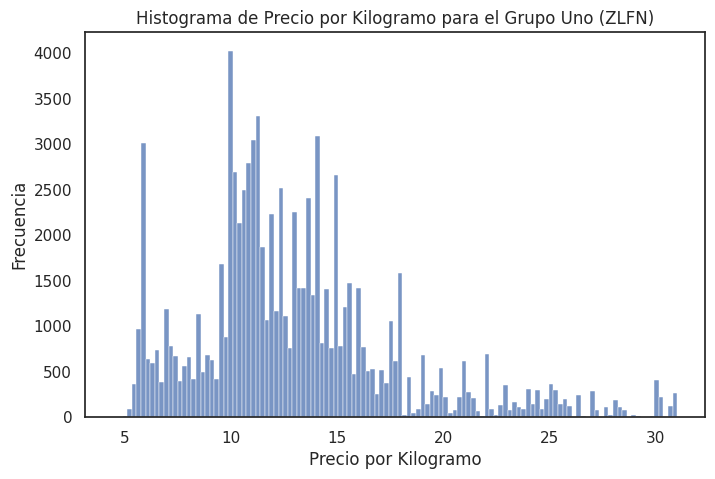

In [ ]:
#Histograma
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(grupo_uno['Price per kilogram'])

plt.title('Histograma de Precio por Kilogramo para el Grupo Uno (ZLFN)')
plt.xlabel('Precio por Kilogramo')
plt.ylabel('Frecuencia')
plt.show()

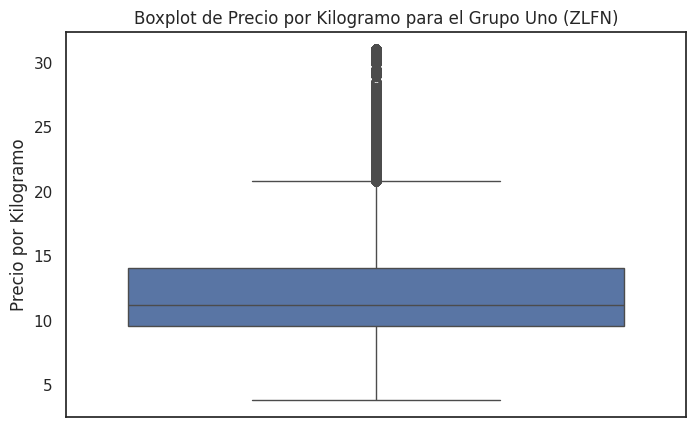

In [ ]:
#Boxplot
sns.boxplot(df['Price per kilogram'])
plt.title('Boxplot de Precio por Kilogramo para el Grupo Uno (ZLFN)')
plt.ylabel('Precio por Kilogramo')
plt.show()

In [ ]:
#Grupo dos: Resto del país

#Media
media_grupo_2=grupo_dos['Price per kilogram'].mean()
print(f"Media grupo dos:{media_grupo_2}")

Media grupo dos:11.77783726655035


In [ ]:
#Mediana
mediana_grupo_2=grupo_dos['Price per kilogram'].median()
print(f"Mediana grupo dos:{mediana_grupo_2}")

Mediana grupo dos:10.9


In [ ]:
#Desviacion Estandar
std_grupo_dos=grupo_dos['Price per kilogram'].std()
print(f"Desviacion Estandar uno:{std_grupo_dos}")

Desviacion Estandar uno:4.222516520372631


In [ ]:
#Minimo
minimo_grupo_dos=grupo_dos['Price per kilogram'].min()
print(f"Minimo:{minimo_grupo_dos}")

Minimo:3.87


In [ ]:
#Maximo
maximo_grupo_dos=grupo_dos['Price per kilogram'].max()
print(f"Maximo:{maximo_grupo_dos}")

Maximo:29.5


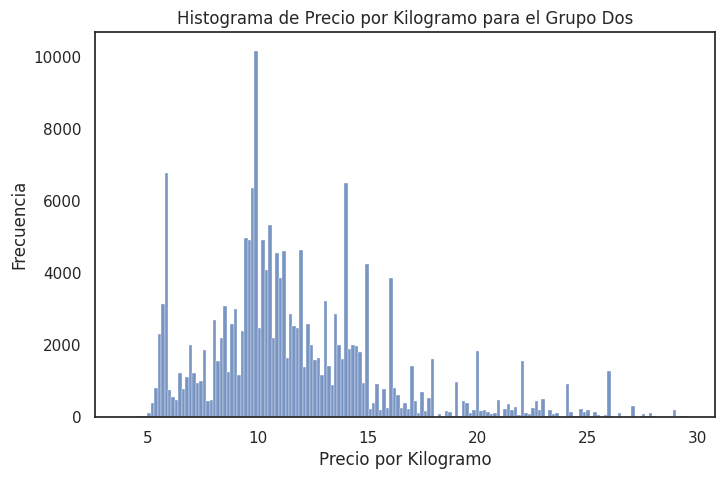

In [ ]:
#Histograma
sns.histplot(grupo_dos['Price per kilogram'])

plt.title('Histograma de Precio por Kilogramo para el Grupo Dos')
plt.xlabel('Precio por Kilogramo')
plt.ylabel('Frecuencia')
plt.show()

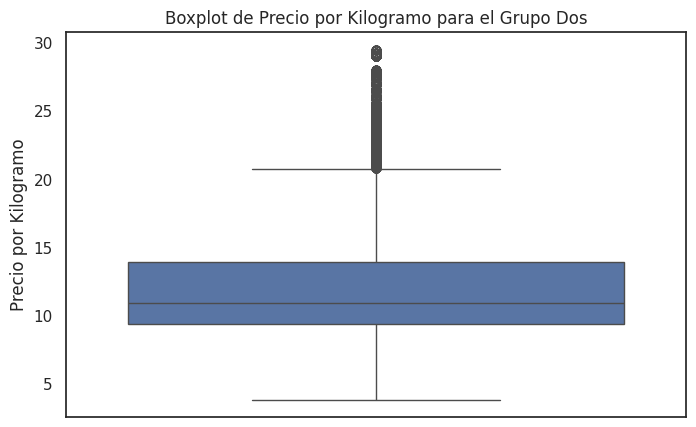

In [ ]:
#Boxplot
sns.boxplot(grupo_dos['Price per kilogram'])
plt.title('Boxplot de Precio por Kilogramo para el Grupo Dos')
plt.ylabel('Precio por Kilogramo')
plt.show()

# *Técnica de bootstrap*

In [ ]:
#Numero de datos totales
numero_datos = df['Price per kilogram'].count()
print(f"Número de datos Total en la columna 'Price per kilogram': {numero_datos}")

Número de datos Total en la columna 'Price per kilogram': 278003


In [ ]:
#Numero total de datos Grupo Uno
numero_datos_2 = grupo_uno['Price per kilogram'].count()
print(f"Número de datos del Grupo Uno en la columna 'Price per kilogram': {numero_datos_2}")

Número de datos del Grupo Uno en la columna 'Price per kilogram': 88294


In [ ]:
#Numero total de datos Grupo Dos
numero_datos_3 = grupo_dos['Price per kilogram'].count()
print(f"Número de datos del Grupo Uno en la columna 'Price per kilogram': {numero_datos_3}")

Número de datos del Grupo Uno en la columna 'Price per kilogram': 189709


# 1. *Distribución, asimetría y curtosis*

*Para saber qué tanta incertidumbre y sesgo hay en la columna Price per kilogram" (Precio por kilogramo), de ambos grupos: "Grupo uno ZLFN" y "Grupo dos del resto del pais" vamos a aplicar la técnica de bootstrap 3 veces:*

*a) Se realizan 10,00 remuestreos, cada uno de 5,000 elementos, obteniendo la "mediana" y guardando los resultados en una lista de nombre "muestras". Se reporta de la siguiente manera:*

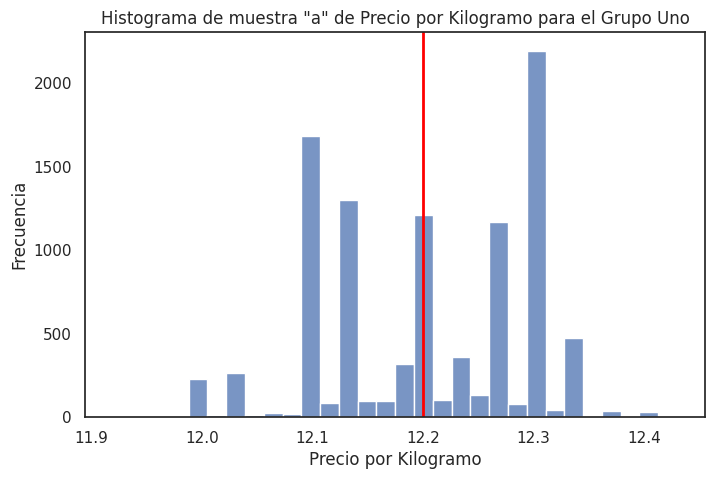

In [ ]:
def calcular_medianas(grupo, iteraciones=10000, num_muestras=5000):
    medians = []
    for _ in range(iteraciones):
        # Realizamos el remuestreo con reemplazo y calculamos la mediana
        sample = grupo['Price per kilogram'].sample(n=num_muestras, replace=True)
        medians.append(sample.median())
    return pd.Series(medians)

# Series 'grupo_uno' y 'grupo_dos'
serie_a_medians_grupo_uno = calcular_medianas(grupo_uno)
serie_a_medians_grupo_dos = calcular_medianas(grupo_dos)

# Calculamos la mediana de los remuestreos para usar en la línea vertical
mediana_muestras_grupo_uno = serie_a_medians_grupo_uno.median()

# Histograma de muestra "a", Grupo Uno
sns.histplot(serie_a_medians_grupo_uno, bins=30)
plt.axvline(mediana_muestras_grupo_uno, color='red', linewidth=2)

plt.title('Histograma de muestra "a" de Precio por Kilogramo para el Grupo Uno')
plt.xlabel('Precio por Kilogramo')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
def calcular_medianas(grupo, iteraciones=10000, num_muestras=5000):
    medians = []
    for _ in range(iteraciones):
        sample = grupo['Price per kilogram'].sample(n=num_muestras, replace=True)
        medians.append(sample.median())
    return pd.Series(medians)

# Calcular medianas para ambos grupos
serie_a_medians_grupo_uno = calcular_medianas(grupo_uno)
serie_a_medians_grupo_dos = calcular_medianas(grupo_dos)
print(min(serie_a_medians_grupo_uno))
print(max(serie_a_medians_grupo_uno))
print(min(serie_a_medians_grupo_dos))
print(max(serie_a_medians_grupo_dos))

11.97
12.43
10.67
11.1


In [ ]:
# Calculamos la mediana de los remuestreos para usar en la línea vertical
mediana_muestras_grupo_uno = serie_a_medians_grupo_uno.median()
print(mediana_muestras_grupo_uno)

mediana_muestras_grupo_dos = serie_a_medians_grupo_dos.median()
print(mediana_muestras_grupo_dos)

12.2
10.9


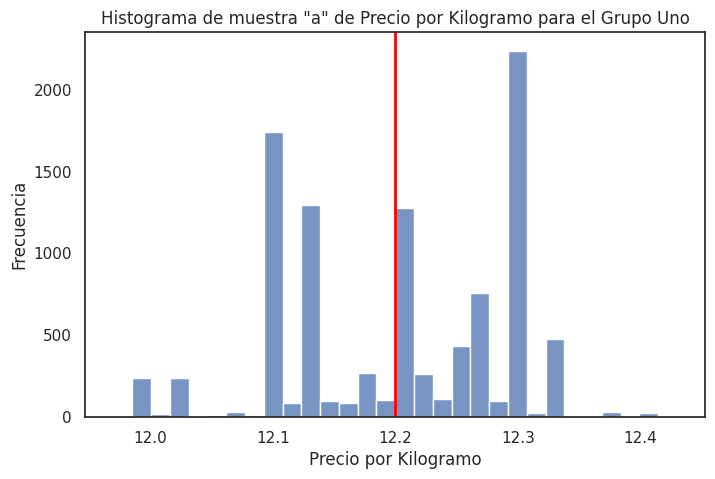

In [ ]:
#Histograma de muestra "a", Grupo Uno
sns.histplot(serie_a_medians_grupo_uno)
plt.axvline(mediana_muestras_grupo_uno, color='red', linewidth=2)

plt.title('Histograma de muestra "a" de Precio por Kilogramo para el Grupo Uno')
plt.xlabel('Precio por Kilogramo')
plt.ylabel('Frecuencia')
plt.show()

Observando la gráfica, la distribución parece tener un pico de lado derecho de la mediana central (aproximadamente 12.3), lo que indica que la mayoría de las medianas obtenidas en los 10,000 remuestreos tienden a agruparse en torno a este valor. La forma de la distribución es asimetrica, con algunos valores atípicos hacia los extremos.

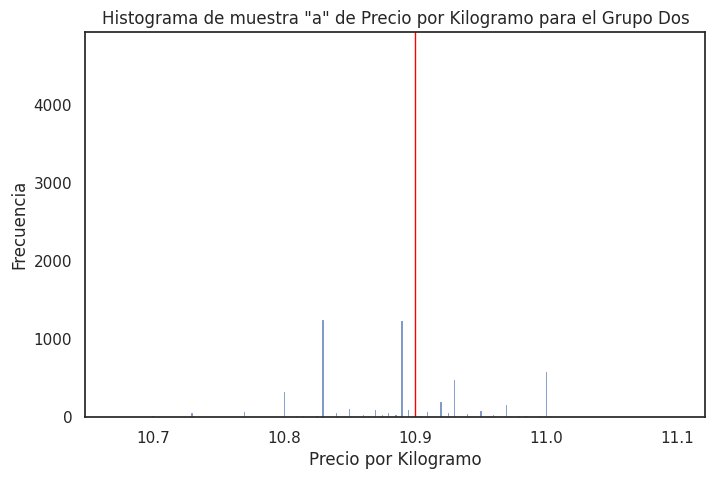

In [ ]:
#Histograma de muestra "a", Grupo Dos

plt.axvline(mediana_muestras_grupo_dos, color='red', linewidth=1)
sns.histplot(serie_a_medians_grupo_dos)

plt.title('Histograma de muestra "a" de Precio por Kilogramo para el Grupo Dos')
plt.xlabel('Precio por Kilogramo')
plt.ylabel('Frecuencia')
plt.show()

A diferencia de la grafica anterior,en el Grupo Dos, la distribución tiene pico en el centro de la mediana central (aproximadamente 10.9), lo que indica que la mayoría de las medianas obtenidas en los 10,000 remuestreos estan mayormente agrupados en tornos al precio por kilogramo de 10.9. La forma de la distribución es asimetrica, con varios valores atípicos hacia ambos extremos.

b) Se realizan 23,000 remuestreos, cada uno de 11,000 elementos, obteniendo la "mediana" y guardando los resultados en una lista de nombre "muestras". Se reporta de la siguiente manera:

In [ ]:
def calcular_medianas(grupo, num_muestras=23000, iteraciones=11000):
    medians = []
    for _ in range(iteraciones):
        sample = grupo['Price per kilogram'].sample(n=num_muestras, replace=True)
        medians.append(sample.median())
    return pd.Series(medians)

# Calcular medianas para ambos grupos
serie_b_medians_grupo_uno = calcular_medianas(grupo_uno)
serie_b_medians_grupo_dos = calcular_medianas(grupo_dos)

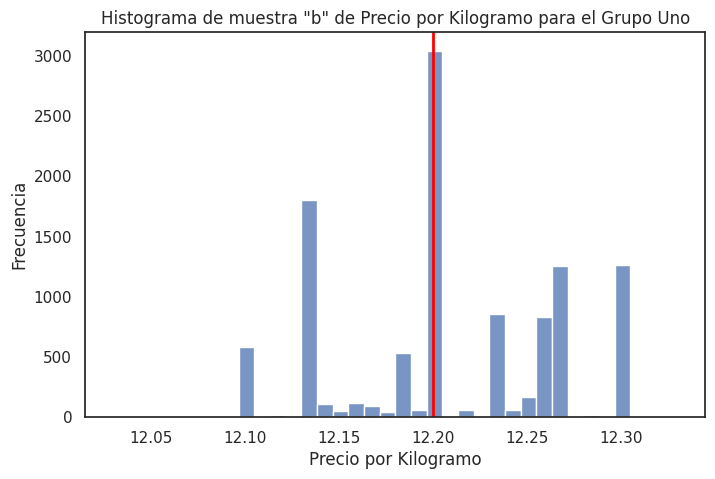

In [ ]:
#Histograma de muestra "b", Grupo Uno
sns.histplot(serie_b_medians_grupo_uno)
plt.axvline(mediana_muestras_grupo_uno, color='red', linewidth=2)

plt.title('Histograma de muestra "b" de Precio por Kilogramo para el Grupo Uno')
plt.xlabel('Precio por Kilogramo')
plt.ylabel('Frecuencia')
plt.show()

Observando la gráfica, la distribución se muestra tener un pico de lado izquierdo de la mediana central (aproximadamente 12.14), lo que indica que la mayoría de las medianas obtenidas en los 23,000 remuestreos tienden a agruparse en torno a este valor. La forma de la distribución es asimetrica, sin demasiados valores atipicos a los lados.

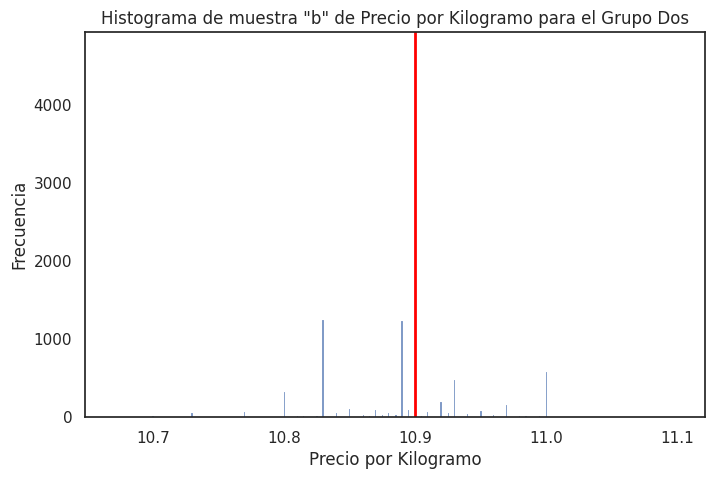

In [ ]:
#Histograma de muestra "b", Grupo Dos

sns.histplot(serie_a_medians_grupo_dos)
plt.axvline(mediana_muestras_grupo_dos, color='red', linewidth=2)

plt.title('Histograma de muestra "b" de Precio por Kilogramo para el Grupo Dos')
plt.xlabel('Precio por Kilogramo')
plt.ylabel('Frecuencia')
plt.show()

La distribución tiene pico en la mediana central, pero esta vez observaos que es de aproximadamente 10.9, lo que indica que la mayoría de las medianas obtenidas en los 23,000 remuestreos estan mayormente agrupados en tornos al precio por kilogramo de  10.8 a 10.9. La forma de la distribución es asimetrica, csin ningun valor atípicos hacia el extremo derecho.

c) Se realizan 43,000 remuestreos, cada uno de 21,000 elementos, obteniendo la "mediana" y guardando los resultados en una lista de nombre "muestras". Se reporta de la siguiente manera:

In [ ]:
def calcular_medianas(grupo, num_muestras=43000, iteraciones=21000):
    medians = []
    for _ in range(iteraciones):
        sample = grupo['Price per kilogram'].sample(n=num_muestras, replace=True)
        medians.append(sample.median())
    return pd.Series(medians)

# Calcular medianas para ambos grupos
serie_c_medians_grupo_uno = calcular_medianas(grupo_uno)
serie_c_medians_grupo_dos = calcular_medianas(grupo_dos)

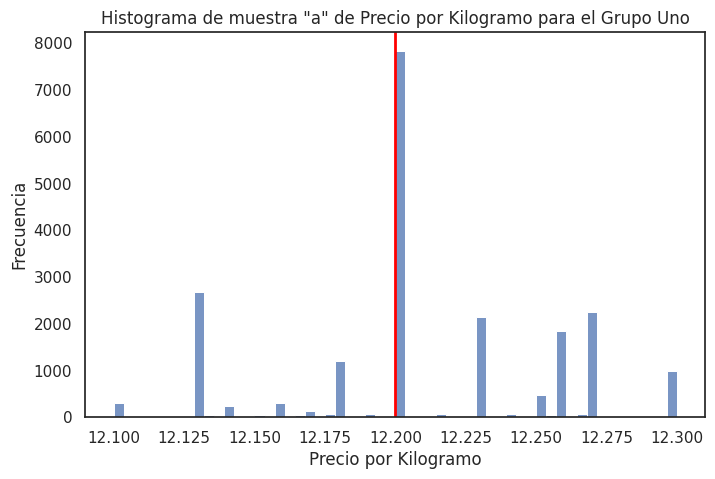

In [ ]:
#Histograma de muestra "c", Grupo Uno
sns.histplot(serie_c_medians_grupo_uno)
plt.axvline(mediana_muestras_grupo_uno, color='red', linewidth=2)

plt.title('Histograma de muestra "a" de Precio por Kilogramo para el Grupo Uno')
plt.xlabel('Precio por Kilogramo')
plt.ylabel('Frecuencia')
plt.show()

La distribución se muestra tener un pico en el centro de la mediana central (aproximadamente 12.2) con tendencia al lado derecho, lo que indica que la mayoría de las medianas obtenidas en los 43,000 remuestreos tienden a agruparse en torno a este valor. La forma de la distribución es asimetrica, con valores atipicos a ambos lados.

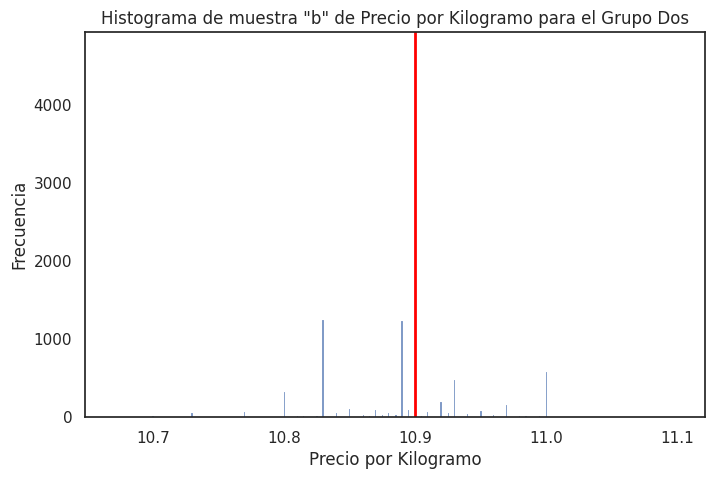

In [ ]:
#Histograma de muestra "c", Grupo Dos

sns.histplot(serie_a_medians_grupo_dos)
plt.axvline(mediana_muestras_grupo_dos, color='red', linewidth=2)

plt.title('Histograma de muestra "b" de Precio por Kilogramo para el Grupo Dos')
plt.xlabel('Precio por Kilogramo')
plt.ylabel('Frecuencia')
plt.show()

Igualmente, en el Grupo Dos la distribución tiene pico de lado izquierdo de la mediana central, pero esta vez observaMos que es de aproximadamente 10.9, lo que indica que la mayoría de las medianas obtenidas en los 43,000 remuestreos estan mayormente agrupados en tornos al precio por kilogramo de  10.8 a 10.9. La forma de la distribución es asimetrica, pero ningun valor atípicos se encuentra hacia el extremo derecho.

# *2. El intervalo de confianza*
*Lo usaremos en 95%, para ello, sacamos el percentil 2.5% y percentil 97.5% aplicandolo a las series creadas en el punto "1. Distribución, asimetría y curtosis", tanto para el grupo uno*

In [ ]:
medianas_totales_grupo_uno = serie_a_medians_grupo_uno.unique()
medianas_totales_grupo_dos = serie_a_medians_grupo_dos.unique()
print(f"Mediana grupo uno:{medianas_totales_grupo_uno}")
print(f"Mediana grupo dos:{medianas_totales_grupo_dos}")

Mediana grupo uno:[12.33  12.2   12.1   12.3   12.13  12.27  12.18  12.215 12.26  12.265
 12.23  12.285 12.125 12.    12.03  12.245 12.11  12.115 12.15  12.4
 12.24  12.255 12.065 12.165 12.16  12.19  12.135 12.145 12.175 12.14
 12.25  12.07  12.315 12.17  12.085 12.155 11.97  12.39  12.015 12.025
 12.37  12.05  12.12  12.385 12.375 12.01  12.185 12.43  12.075 12.415
 12.38  12.36  12.225 12.365 12.06  12.35  12.345]
Mediana grupo dos:[10.9   10.855 10.83  10.89  11.    10.8   10.93  10.87  10.94  10.88
 10.91  10.92  10.86  10.825 10.885 10.85  10.895 10.97  10.95  10.77
 10.925 10.96  10.84  10.73  10.7   10.72  10.87  10.99  10.82  10.81
 10.905 10.985 10.995 10.98  10.815 10.865 10.88  10.915 10.875 10.955
 10.69  10.785 10.74  10.67  10.76  11.1   10.965 10.75  10.685 10.725
 10.71  10.865 10.715 11.03 ]


In [ ]:
#Serie "a" Grupo Uno
limite_inferior_a_uno = serie_a_medians_grupo_uno.quantile(0.025)
limite_superior_a_uno = serie_a_medians_grupo_uno.quantile(0.975)
print(f"- El intervalo de confianza del 95% para la mediana es de {limite_inferior_a_uno} a {limite_superior_a_uno}")

#Serie "a" Grupo Dos
limite_inferior_a_dos = serie_a_medians_grupo_dos.quantile(0.025)
limite_superior_a_dos = serie_a_medians_grupo_dos.quantile(0.975)
print(f"- El intervalo de confianza del 95% para la mediana es de {limite_inferior_a_dos} a {limite_superior_a_dos}")

- El intervalo de confianza del 95% para la mediana es de 12.015 a 12.33
- El intervalo de confianza del 95% para la mediana es de 10.8 a 11.0


In [ ]:
#Serie "b" Grupo Uno
limite_inferior_b_uno = serie_b_medians_grupo_uno.quantile(0.025)
limite_superior_b_uno = serie_b_medians_grupo_uno.quantile(0.975)
print(f"- El intervalo de confianza del 95% para la mediana es de {limite_inferior_b_uno} a {limite_superior_b_uno}")

#Serie "b" Grupo Dos
limite_inferior_b_dos = serie_b_medians_grupo_dos.quantile(0.025)
limite_superior_b_dos = serie_b_medians_grupo_dos.quantile(0.975)
print(f"- El intervalo de confianza del 95% para la mediana es de {limite_inferior_b_dos} a {limite_superior_b_dos}")

- El intervalo de confianza del 95% para la mediana es de 12.1 a 12.3
- El intervalo de confianza del 95% para la mediana es de 10.83 a 10.9


In [ ]:
#Serie "c" Grupo Uno
limite_inferior_c_uno = serie_c_medians_grupo_uno.quantile(0.025)
limite_superior_c_uno = serie_c_medians_grupo_uno.quantile(0.975)
print(f"- El intervalo de confianza del 95% para la mediana es de {limite_inferior_c_uno} a {limite_superior_c_uno}")

#Serie "c" Grupo Dos
limite_inferior_c_dos = serie_c_medians_grupo_dos.quantile(0.025)
limite_superior_c_dos = serie_c_medians_grupo_dos.quantile(0.975)
print(f"- El intervalo de confianza del 95% para la mediana es de {limite_inferior_c_dos} a {limite_superior_c_dos}")

- El intervalo de confianza del 95% para la mediana es de 12.13 a 12.3
- El intervalo de confianza del 95% para la mediana es de 10.89 a 10.9


In [ ]:
#Media:

#Grupo Uno
media_grupo_uno=grupo_uno['Price per kilogram'].mean()
print(f"- Media grupo uno:{media_grupo_uno}")

#Grupo Dos
media_grupo_dos=grupo_dos['Price per kilogram'].mean()
print(f"- Media grupo dos:{media_grupo_dos}")

- Media grupo uno:13.116857091082068
- Media grupo dos:11.77783726655035


In [ ]:
#Promedio de los intervalos:

#Grupo Uno
promedio_intervalos = ((media_grupo_uno - limite_inferior_a_uno) + (limite_superior_a_uno - media_grupo_uno)) / 2
print(f"- Intervalo de 95% de confianza de la media grupo uno: {media_grupo_uno} +/- {promedio_intervalos}")

#Grupo Dos
promedio_intervalos = ((media_grupo_dos - limite_inferior_a_dos) + (limite_superior_a_dos - media_grupo_dos)) / 2
print(f"- Intervalo de 95% de confianza de la media grupo dos: {media_grupo_dos} +/- {promedio_intervalos}")

- Intervalo de 95% de confianza de la media grupo uno: 13.116857091082068 +/- 0.15749999999999975
- Intervalo de 95% de confianza de la media grupo dos: 11.77783726655035 +/- 0.09999999999999964


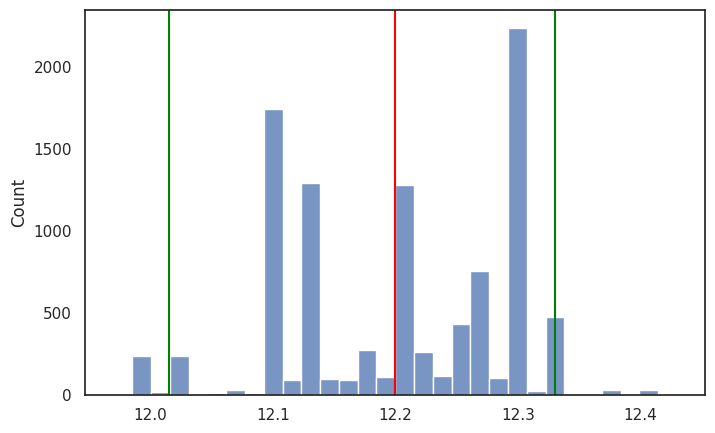

In [ ]:
#Histograma

#Grupo Uno
sns.histplot(serie_a_medians_grupo_uno)
plt.axvline(mediana_muestras_grupo_uno, color='red')
plt.axvline(limite_inferior_a_uno, color='green')
plt.axvline(limite_superior_a_uno, color='green')

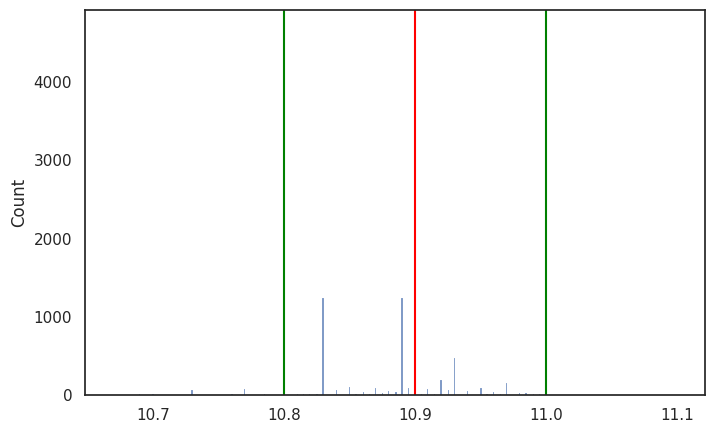

In [ ]:
#Grupo Dos
sns.histplot(serie_a_medians_grupo_dos)
plt.axvline(mediana_muestras_grupo_dos, color='red')
plt.axvline(limite_inferior_a_dos, color='green')
plt.axvline(limite_superior_a_dos, color='green')

# *3. El error estándar*

In [ ]:
#Calculamos la desviacion estandar para ambos grupos
std_grupo_uno=grupo_uno['Price per kilogram'].std()
std_grupo_dos=grupo_dos['Price per kilogram'].std()
print(f"Desviacion Estandar uno:{std_grupo_uno}")
print(f"Desviacion Estandar dos:{std_grupo_dos}")

Desviacion Estandar uno:4.894530153875261
Desviacion Estandar dos:4.222516520372631


In [ ]:
std_error_grupo_uno=std_grupo_uno/np.sqrt(numero_datos_2)
std_error_grupo_dos=std_grupo_dos/np.sqrt(numero_datos_3)
print(numero_datos_2)
print(numero_datos_3)
print(f"Error estandar grupo uno:{std_error_grupo_uno}")
print(f"Error estandar grupo dos:{std_error_grupo_dos}")

88294
189709
Error estandar grupo uno:0.01647196505744863
Error estandar grupo dos:0.00969454408761476


# *4. Modelos de Regresión Lineal Múltiple*

In [ ]:
df.head()

State            City  Year  Month  Day         Store type  \
0       Aguascalientes  Aguascalientes  2007      1   10  Mom and Pop Store   
2      Baja California         Tijuana  2007      1   10  Mom and Pop Store   
3  Baja California Sur          La Paz  2007      1   10  Mom and Pop Store   
4             Campeche        Campeche  2007      1   10  Mom and Pop Store   
5             Coahuila  Piedras Negras  2007      1   10  Mom and Pop Store   

   Price per kilogram        Price Category  
0                 9.9  Medio Bajo ($10-$16)  
2                10.0  Medio Bajo ($10-$16)  
3                10.0  Medio Bajo ($10-$16)  
4                10.0  Medio Bajo ($10-$16)  
5                10.0  Medio Bajo ($10-$16)

In [ ]:
#Eliminar datos nulos
df =df.dropna(subset=['Price per kilogram'])
df = df.reset_index(drop=True)

#Creamos DF x y
X = df[['State', 'City', 'Year', 'Month', 'Day', 'Store type']]
y = df['Price per kilogram']

In [ ]:
#Utilizar endcoder
one_hot_encoder = OneHotEncoder()
X_encoded = one_hot_encoder.fit_transform(X[['State', 'City', 'Store type']])
encode_df = pd.DataFrame(X_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(['State', 'City', 'Store type']))
X = pd.concat([X.drop(['State', 'City', 'Store type'], axis=1), encode_df], axis=1)

In [ ]:
#Creamos dataset para el entrenamiento del modelo y su validacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.head()
y_test.head()

258753    24.00
260977    29.00
57913      6.43
230616    10.73
149012    15.00
Name: Price per kilogram, dtype: float64

In [ ]:
#Estandarizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Crear y compilar el modelo
model = Sequential()
model.add(Dense(1, input_dim=X_train_scaled.shape[1], activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
#Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
6951/6951 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 123.4485
Epoch 2/100
6951/6951 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 24.0209
Epoch 3/100
6951/6951 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 3.4681
Epoch 4/100
6951/6951 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 3.3167
Epoch 5/100
6951/6951 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 3.3212
Epoch 6/100
6951/6951 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 3.3240
Epoch 7/100
6951/6951 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 3.3328
Epoch 8/100
6951/6951 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 3.3326
Epoch 9/100
6951/6951 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 3.3260
Epoch 10/100
6951/6951 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 3.3438
Epoch 11/100
6951/6951 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 3.3408
Epoch 12/100
6951/6951 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 3.3329
Epoch 13/100
6951/6951 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 3.3336
Epoch 14/100
6951/6951 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 3.325

In [ ]:
#Calcular pérdida
loss = model.evaluate(X_test_scaled, y_test)
print(f'Pérdida del modelo: {loss}')

1738/1738 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - loss: 3.3634
Pérdida del modelo: 3.3660857677459717


In [ ]:
#Prediccion
y_pred = model.predict(X_test_scaled)
#print(y_pred)
for i in range(len(y_pred)):
#print(f'datos calculo {X_test[i]["Year"]}')
  print(f"Precio real: {y_test.iloc[i]}, Precio predicho: {y_pred[i][0]}")
y_test.head()

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Precio real: 11.8, Precio predicho: 11.202646255493164
Precio real: 20.0, Precio predicho: 17.825401306152344
Precio real: 14.25, Precio predicho: 15.559064865112305
Precio real: 17.0, Precio predicho: 17.017578125
Precio real: 11.8, Precio predicho: 14.376411437988281
Precio real: 8.36, Precio predicho: 7.162364959716797
Precio real: 7.07, Precio predicho: 7.053621768951416
Precio real: 10.23, Precio predicho: 8.358201026916504
Precio real: 20.0, Precio predicho: 18.620168685913086
Precio real: 19.33, Precio predicho: 19.11676788330078
Precio real: 10.7, Precio predicho: 12.101998329162598
Precio real: 11.5, Precio predicho: 10.555704116821289
Precio real: 21.0, Precio predicho: 17.66476058959961
Precio real: 7.03, Precio predicho: 6.369670391082764
Precio real: 14.13, Precio predicho: 13.707735061645508
Precio real: 10.03, Precio predicho: 9.655457496643066
Precio real: 13.3, Precio predicho: 14.91634464263916
Precio 

258753    24.00
260977    29.00
57913      6.43
230616    10.73
149012    15.00
Name: Price per kilogram, dtype: float64

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Coeficiente de determinación (R^2): {r2}")
print(f"Error absoluto medio (MAE): {mae}")


Coeficiente de determinación (R^2): 0.8341126349129724
Error absoluto medio (MAE): 1.323502191144724


# **Sesión 6. Visualización de datos avanzada**

# *Treemap*

*Para una visualización avanzada de los datos, se hará uso de las gráficas Treemap, que recolecta la información anidada en rectángulos y describe una organización jerarquica, en este caso se hace uso del rango de precios por kg de tortilla establecidos como: Bajo (0-9), medio bajo (10-16), medio (17-24), alto (25-32) y muy alto (>32), esto de cada uno de los estados registrados en la base de datos.*  

In [ ]:
#categorización de los precios
import pandas as pd
from IPython.display import display

# Definir los rangos y etiquetas para los precios en pesos mexicanos
bins = [0, 9, 16, 24, 32, float('inf')]
labels = ['Bajo ($0-$9)', 'Medio Bajo ($10-$16)', 'Medio ($17-$24)', 'Alto ($25-$32)', 'Muy Alto (>$32)']

In [ ]:
# Crear una nueva columna en el DataFrame con los precios categorizados
df['Price Category'] = pd.cut(df['Price per kilogram'], bins=bins, labels=labels, right=False)

In [ ]:
#agrupando por estado y price categority
df_grouped = df.groupby(['State', 'Price Category']).size().reset_index(name='count')

<ipython-input-153-64e23f21e45e>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
df_grouped.head()

State        Price Category  count
0  Aguascalientes          Bajo ($0-$9)    811
1  Aguascalientes  Medio Bajo ($10-$16)   3992
2  Aguascalientes       Medio ($17-$24)    391
3  Aguascalientes        Alto ($25-$32)      0
4  Aguascalientes       Muy Alto (>$32)      0

In [ ]:
#importaciones
import plotly.express as px

In [ ]:
#treemap
fig = px.treemap(
    df_grouped,
    path=['State', 'Price Category'],
    values='count'
)

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Análisis:**

*Esta gráfica muestra la distribución de los precios de la tortilla por kilogramo en cada estado de la República Mexicana. El tamaño de cada rectángulo representa la cantidad de registros dentro de cada categoría de precio. Los estados se agrupan por color, visualmente se observan qué estados tienen mayor cantidad de registros en cada categoría de precio. Se puede observar que algunos estados tienen precios más altos o más bajos en general, o que algunos estados tienen mayor variabilidad en los precios.*

# **Scatterplot por categorias o variables condicionantes**
# Grupo uno: Zona Libre de la Frontera Norte

In [ ]:
#agrupaciones por tipo de tienda en el grupo uno
df_grouped_g1 = grupo_uno.groupby(['Store type', 'Year'])['Price per kilogram'].mean().to_frame().reset_index()

In [ ]:
df_grouped_g1.head()

Store type  Year  Price per kilogram
0  Big Retail Store  2007            5.871849
1  Big Retail Store  2008            5.968754
2  Big Retail Store  2009            6.545672
3  Big Retail Store  2010            7.157378
4  Big Retail Store  2011            8.030838

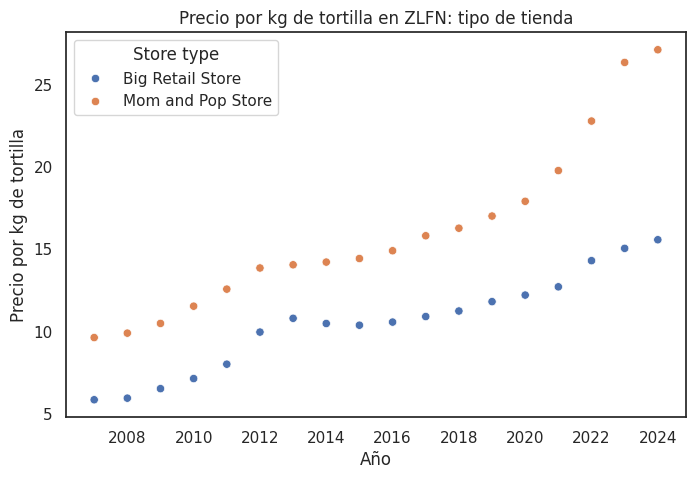

In [ ]:
#scatterplot g1 por tipo de tienda
grupo_1=sns.scatterplot(data=df_grouped_g1, x='Year', y='Price per kilogram', hue='Store type')
plt.title('Precio por kg de tortilla en ZLFN: tipo de tienda')

grupo_1.set_xlabel('Año')
grupo_1.set_ylabel('Precio por kg de tortilla')

#configurar eje x
import matplotlib.ticker as ticker
grupo_1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

**Análisis:**

*Esta gráfica muestra la relación entre el año y el precio por kilogramo de la tortilla en la Zona Libre de la Frontera Norte (ZLFN), diferenciando por tipo de tienda ('Big retail store' y 'Mom and pop store'). Se observa una tendencia general al alza en los precios de la tortilla en ambos tipos de tiendas. Los precios en 'Big retail store' tienden a ser ligeramente más bajos que en 'Mom and Pop store'. La gráfica sugiere que el precio de la tortilla en la ZLFN ha ido en aumento con el tiempo, y que el tipo de tienda puede influir en el precio, aunque la diferencia no es muy significativa.*

#Grupo dos: resto del país

In [ ]:
#agrupaciones por tipo de tienda en el grupo 2
df_grouped_g2 = grupo_dos.groupby(['Store type', 'Year'])['Price per kilogram'].mean().to_frame().reset_index()

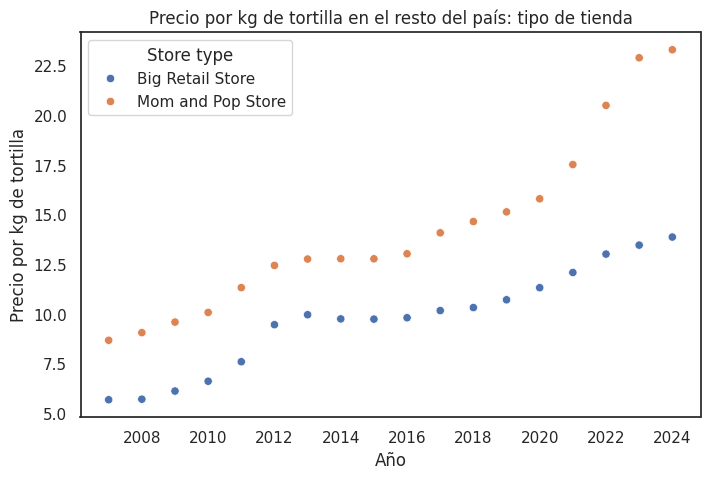

In [ ]:
#scatterplot g2 por tipo de tienda
grupo_2=sns.scatterplot(data=df_grouped_g2, x='Year', y='Price per kilogram', hue='Store type')
plt.title('Precio por kg de tortilla en el resto del país: tipo de tienda')

grupo_2.set_xlabel('Año')
grupo_2.set_ylabel('Precio por kg de tortilla')
grupo_2.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

**Análisis:**

*Esta gráfica muestra la relación entre el año y el precio por kilogramo de la tortilla en el resto del país, diferenciando por tipo de tienda ('Big retail store' y 'Mom and pop store').*
*Se observa una tendencia similar al alza en los precios de la tortilla, aunque la diferencia entre los precios en 'Big retail store' y 'Mom and pop store' parece ser un poco mayor en este grupo. Al igual que en la ZLFN, el precio de la tortilla en el resto del país ha ido en aumento con el tiempo. La diferencia en los precios por tipo de tienda podría ser mayor en este grupo, lo que sugiere que la competencia o la estructura del mercado podrían variar entre las regiones*

# **Binnings hexagonales**


#Grupo uno: Zona Libre de la frontera Norte

In [ ]:
# Binning Hexagonal
import seaborn as sns
import matplotlib.pyplot as plt

bh=sns.jointplot(data=grupo_uno, x='Year', y='Price per kilogram', kind='hex')
bh.ax_joint.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

**Análisis:**

*Esta gráfica muestra la densidad de los puntos en el espacio del año y el precio por kilogramo de la tortilla en la Zona Libre de la Frontera Norte. Los hexágonos más oscuros indican una mayor concentración de datos.Esta gráfica confirma la tendencia al alza en los precios de la tortilla en la ZLFN, y muestra que la mayoría de los datos se concentran en los precios más recientes y altos.*

#Grupo dos: Resto del país

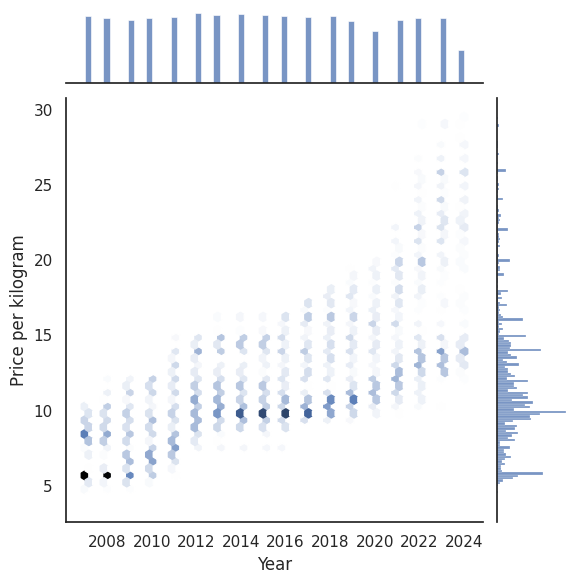

In [ ]:
bh_g2=sns.jointplot(data=grupo_dos, x='Year', y='Price per kilogram', kind='hex')
bh_g2.ax_joint.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

**Análisis:**

*Esta gráfica muestra la densidad de los puntos en el espacio del año y el precio por kilogramo de la tortilla en el resto del país. Se observa una alta concentración de datos en los años más recientes y en precios más altos. Al igual que en la ZLFN, el binning hexagonal confirma la tendencia al alza en los precios de la tortilla en el resto del país, y muestra que la mayoría de los datos se concentran en los precios más recientes y altos.*

# **Sesión 7.Procesamiento de lenguaje natural**

*Esta sección del proyecto no es aplicable a la base de datos del precio por kilogramo de tortilla, ya que no tiene las propiedades para aplicar el procesamiento de lenguaje natural, por ello se optó utilizar otra base que trata sobre los comentarios a restaurantes, en la cuál se realizarán busquedas que giten en torno a la tortilla o el maíz.*

In [ ]:
dfr=pd.read_csv('/content/drive/MyDrive/Team 25 BEDU/Restaurant reviews.csv')
dfr.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures    7514  
0   1 Review , 2 Followers  5/25/2019 15:54         0  2447.0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0     NaN  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0     NaN  
3    1 Review , 1 Follower  5/24/2019 22:11         0     NaN  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0     NaN

# **NLTK-TEXT**

*Se hace uso de un dataset sobre los comentarios de restaurantes donde se realizaran busquedas como "taco" que es un alimento que se realiza a base de la tortilla.*

In [ ]:
#importaciones para lenguaje natural
import nltk

In [ ]:
#agrupando solo por review y reviewer
agrupacion=dfr.groupby('Reviewer')['Review'].last()
agrupacion.head()

Reviewer
#FOODPORN                      Delicious,mouthwatering dishes and a must try ...
#chloesviews // CAH            Very delicious millet and chicken dish.\nI fee...
$ign                           Had the long island and the salsa nachos, both...
4mybanti                       Too expensive and is served with very less qua...
@FuloriBinaChutneyKaiseBani    What a delightful place. Food was the star her...
Name: Review, dtype: object

*Se realiza una limpieza de los datos*

In [ ]:
# todas las letras con minúsculas
agrupacion = agrupacion.str.lower()
# quitarle espacios al principio y al final del texto
agrupacion= agrupacion.str.strip()
# reemplazar todos los símbolos que no sean alfanuméricos o espacios por "" (nada), o sea quitarlos
agrupacion = agrupacion.str.replace('[^\w\s]', '', regex=True)
# reemplazar todos los números por ""
agrupacion = agrupacion.str.replace('\d', '', regex=True)
# reemplazar todos los símbolos de "nueva línea" por ""
agrupacion = agrupacion.str.replace('\\n', '', regex=True)
# deshacernos de las filas que tienen datos nulos
agrupacion = agrupacion.dropna()

agrupacion

Reviewer
#FOODPORN                      deliciousmouthwatering dishes and a must try d...
#chloesviews // CAH            very delicious millet and chicken dishi feel s...
$ign                           had the long island and the salsa nachos bothe...
4mybanti                       too expensive and is served with very less qua...
@FuloriBinaChutneyKaiseBani    what a delightful place food was the star here...
                                                     ...                        
ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ                 pretty good deal poha was cold and dry rest of...
ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ                   the waiters are super slow the cutlery used in...
✌️✌️Reddy 🥂🍽️                  saturday night unlimited buffet with drinks at...
✔️ Sonu                        just average  i had paya shor a from this plac...
🍛🍲🥗                            delivery  always on timegreat value for moneyt...
Name: Review, Length: 7442, dtype: object

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
tokenized =agrupacion.apply(nltk.word_tokenize)

tokenized

Reviewer
#FOODPORN                      [deliciousmouthwatering, dishes, and, a, must,...
#chloesviews // CAH            [very, delicious, millet, and, chicken, dishi,...
$ign                           [had, the, long, island, and, the, salsa, nach...
4mybanti                       [too, expensive, and, is, served, with, very, ...
@FuloriBinaChutneyKaiseBani    [what, a, delightful, place, food, was, the, s...
                                                     ...                        
ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ                 [pretty, good, deal, poha, was, cold, and, dry...
ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ                   [the, waiters, are, super, slow, the, cutlery,...
✌️✌️Reddy 🥂🍽️                  [saturday, night, unlimited, buffet, with, dri...
✔️ Sonu                        [just, average, i, had, paya, shor, a, from, t...
🍛🍲🥗                            [delivery, always, on, timegreat, value, for, ...
Name: Review, Length: 7442, dtype: object

In [ ]:
#Juntar la descripciones en una misma lista
palabras=tokenized.sum()
palabras

['deliciousmouthwatering',
 'dishes',
 'and',
 'a',
 'must',
 'try',
 'dim',
 'sum',
 'lunch',
 'which',
 'is',
 'pocket',
 'friendly',
 'the',
 'viewservice',
 'and',
 'the',
 'food',
 'are',
 'on',
 'kudos',
 'to',
 'the',
 'team',
 'very',
 'delicious',
 'millet',
 'and',
 'chicken',
 'dishi',
 'feel',
 'so',
 'good',
 'ordering',
 'and',
 'eating',
 'from',
 'eatfit',
 'bc',
 'i',
 'can',
 'see',
 'the',
 'nutritional',
 'value',
 'and',
 'no',
 'where',
 'else',
 'i',
 'have',
 'found',
 'this',
 'yet',
 'i',
 'love',
 'that',
 'they',
 'give',
 'a',
 'mini',
 'free',
 'desert',
 'too',
 'perfect',
 'sweet',
 'treat',
 'after',
 'a',
 'meal',
 'had',
 'the',
 'long',
 'island',
 'and',
 'the',
 'salsa',
 'nachos',
 'bothered',
 'excellent',
 'the',
 'nachos',
 'were',
 'delicious',
 'with',
 'a',
 'smoked',
 'after',
 'taste',
 'which',
 'was',
 'fantastic',
 'the',
 'music',
 'and',
 'ambiance',
 'was',
 'on',
 'point',
 'and',
 'honestly',
 'first',
 'place',
 'iv',
 'seen',
 'w

In [ ]:
#Objeto tipo nltk.text
text=nltk.Text(palabras)
text

<Text: deliciousmouthwatering dishes and a must try dim sum...>

*Se realiza una busqueda del contexto de un comentario que incluye la palabra taco.*


In [ ]:
text.concordance('taco', lines=20)

In [ ]:
#palabras con contexto similar a taco
text.similar('taco')

*Se realiza una busqueda que contenga la palabra mexicana, esto para saber sí hay algún comentario ligado al tipo de comida mexicana y explorar sí en alguno de ellos se incluye la tortilla en su preparación.*

In [ ]:
text.concordance('mexican', lines=20)

Displaying 20 of 30 matches:
would love to visit again i ordered mexican corn partha but partha was not prop
ther was burned there is nothing as mexican in it and the corn was super old ok
oodpunjabi stereotypicalfood boring mexican corn paratha is good but you can im
provide less items dessert was good mexican fried icecrm was smething i tried f
read of indian oriental continental mexican food will definitely recommend to f
ng weekends is slim to none i order mexican veg salad what dressing giving i do
placegal punjab di i had wings with mexican jerkit tastes deliciousquantity is 
 why we had left the soup i ordered mexican corn and punjabi aloo parathaqualit
dered especial paratha combo paneer mexican corn as usually its fantastic and l
e corn parantha while i had ordered mexican corn delivery guy delivered the foo
izza was pretty good we ordered the mexican pizza along with crispy lotus stem 
t ambiance and music we had ordered mexican pizza chicken platter seafood platt
ngs are coa

In [ ]:
#palabras con contexto similar a mexican
text.similar('mexican')

chicken crispy a the thai food fried ordered veg other some best
special whole steamed bamboo egg and good was


# **NLTK FreqDist**

*Se obtuvo la frecuencia de las palabras más comunes de los comentarios.*

In [ ]:
#distribución de frecuencia
freq_dist=nltk.FreqDist(text)
freq_dist

FreqDist({'the': 14971, 'and': 12011, 'was': 6997, 'to': 6770, 'a': 6399, 'is': 6260, 'of': 4972, 'i': 4777, 'good': 4657, 'for': 4481, ...})

In [ ]:
#Borrar las palabras que no tienen información
freq_dist.most_common(20)

[('the', 14971),
 ('and', 12011),
 ('was', 6997),
 ('to', 6770),
 ('a', 6399),
 ('is', 6260),
 ('of', 4972),
 ('i', 4777),
 ('good', 4657),
 ('for', 4481),
 ('food', 4321),
 ('with', 3778),
 ('place', 3697),
 ('it', 3653),
 ('in', 3504),
 ('this', 3084),
 ('very', 2751),
 ('not', 2558),
 ('we', 2490),
 ('they', 2164)]

In [ ]:
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')

english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
all_words_without_stopwords = [word for word in palabras if word not in english_stopwords]

all_words_without_stopwords

['deliciousmouthwatering',
 'dishes',
 'must',
 'try',
 'dim',
 'sum',
 'lunch',
 'pocket',
 'friendly',
 'viewservice',
 'food',
 'kudos',
 'team',
 'delicious',
 'millet',
 'chicken',
 'dishi',
 'feel',
 'good',
 'ordering',
 'eating',
 'eatfit',
 'bc',
 'see',
 'nutritional',
 'value',
 'else',
 'found',
 'yet',
 'love',
 'give',
 'mini',
 'free',
 'desert',
 'perfect',
 'sweet',
 'treat',
 'meal',
 'long',
 'island',
 'salsa',
 'nachos',
 'bothered',
 'excellent',
 'nachos',
 'delicious',
 'smoked',
 'taste',
 'fantastic',
 'music',
 'ambiance',
 'point',
 'honestly',
 'first',
 'place',
 'iv',
 'seen',
 'provielde',
 'sugar',
 'cane',
 'stick',
 'sterer',
 'genius',
 'idea',
 'good',
 'chew',
 'wait',
 'food',
 'anything',
 'manager',
 'outlet',
 'took',
 'cake',
 'terms',
 'service',
 'stand',
 'chap',
 'props',
 'expensive',
 'served',
 'less',
 'quantity',
 'went',
 'family',
 'disappointing',
 'many',
 'menu',
 'items',
 'werent',
 'available',
 'poor',
 'service',
 'great',
 

In [ ]:
freq_dist_without_stopwords = nltk.FreqDist(all_words_without_stopwords)

freq_dist_without_stopwords.most_common(50)

[('good', 4657),
 ('food', 4321),
 ('place', 3697),
 ('service', 2099),
 ('chicken', 1955),
 ('taste', 1422),
 ('ordered', 1408),
 ('great', 1320),
 ('one', 1177),
 ('ambience', 1170),
 ('time', 1115),
 ('really', 1100),
 ('also', 1021),
 ('nice', 987),
 ('like', 987),
 ('best', 979),
 ('visit', 887),
 ('biryani', 871),
 ('staff', 867),
 ('restaurant', 848),
 ('order', 815),
 ('try', 806),
 ('experience', 782),
 ('would', 683),
 ('veg', 678),
 ('well', 676),
 ('amazing', 635),
 ('us', 619),
 ('awesome', 616),
 ('even', 598),
 ('quality', 587),
 ('must', 567),
 ('served', 546),
 ('dont', 518),
 ('bad', 500),
 ('starters', 499),
 ('friends', 497),
 ('rice', 491),
 ('go', 489),
 ('went', 475),
 ('much', 461),
 ('tasty', 453),
 ('menu', 444),
 ('love', 443),
 ('quantity', 442),
 ('get', 434),
 ('worst', 431),
 ('buffet', 428),
 ('paneer', 413),
 ('got', 394)]

In [ ]:
#Cantidad de veces que aparece la palabra taco
freq_dist_without_stopwords['taco']

2

In [ ]:
#cantidad de veces que aparece la palabra mexican
freq_dist_without_stopwords['mexican']

30

In [ ]:
# Porcentaje de aparición de la palabra taco

taco=freq_dist_without_stopwords['taco'] / len(all_words_without_stopwords) * 100
print(taco)

# Porcentaje de aparición de la palabra mexican
mexican=freq_dist_without_stopwords['mexican'] / len(all_words_without_stopwords) * 100
print(mexican)

0.0010900667665894536
0.016351001498841805


In [ ]:
# Palabras que solamente aparecen una vez

freq_dist_without_stopwords.hapaxes()

['deliciousmouthwatering',
 'viewservice',
 'millet',
 'dishi',
 'nutritional',
 'iv',
 'provielde',
 'sterer',
 'genius',
 'grinning',
 'feat',
 'grumpy',
 'prospect',
 'ganesh',
 'chaturthy',
 'halfway',
 'currysteamed',
 'activated',
 'manvsfood',
 'parcelled',
 'tastedbothmuttonbiryanichickenfrybiryanimutton',
 'tastybutchicken',
 'chickenpeices',
 'scoreboardtastemuttonbiryani',
 'valueformoneymuttonbiryani',
 'goodflavorsome',
 'foodambincefoodservice',
 'hyderabadroadside',
 'takingambiance',
 'lightingvalue',
 'cracks',
 'nonexistent',
 'appalling',
 'dinnerlove',
 'peer',
 'shubroto',
 'youmusic',
 'hippie',
 'cannotexperience',
 'placeatmosphere',
 'starsmusic',
 'montu',
 'againreally',
 'misbehave',
 'chucked',
 'donalds',
 'threaten',
 'disgustingwill',
 'morepathetic',
 'disgusted',
 'okit',
 'thinghad',
 'villas',
 'ricesarso',
 'bullet',
 'tastedvery',
 'worstvery',
 'facilityvalue',
 'personstaff',
 'premiumitems',
 'menubut',
 'brilliantvariety',
 'enormousthis',
 'ma

In [ ]:
#generando una lista con las 20 palabras más comunes
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_without_stopwords.most_common(20))))

In [ ]:
#asignadole una variable ca cada palabra y su frecuencia
words = most_common_20[:, 0]
frequencies = most_common_20[:, 1].astype(int)

*Se realiza una gráfica de barras de las palabras más comunes en la base de datos.*

<ipython-input-185-d4dc62a77c67>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




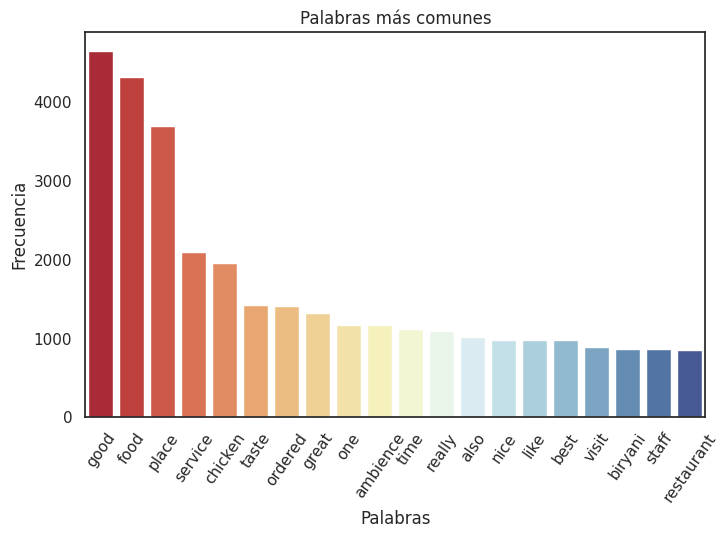

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

grafica= sns.barplot(x=words, y=frequencies, ax=ax, palette="RdYlBu")
plt.xticks(rotation=55);
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes')
plt.show();

In [ ]:
#primeras 200 palabras
most_common_200 = np.array(list(map(lambda x: list(x), freq_dist_without_stopwords.most_common(200))))

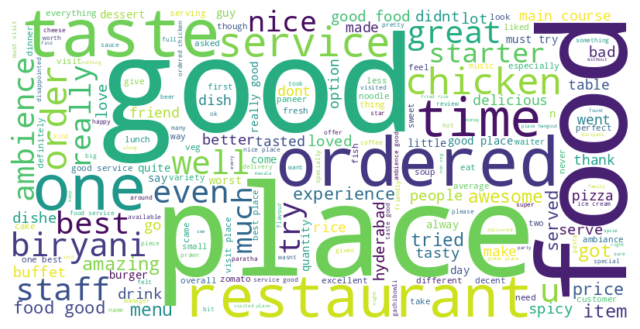

In [ ]:
from wordcloud import WordCloud

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(all_words_without_stopwords))

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Conclusión:**

*El lenguaje natural permitió realizar busquedas de los alimentos elaborados con tortilla de maíz como los tacos. En este dataset, unicamente se encontraron 2 reviews que mencionaron este alimento. Se realizó un busqueda a través de la palabra mexican para determinar si había más alimentos a base de tortilla, pero no se encontraron más. Sin embargo, lo que si se logro observar fueron otros alimentos a base del maíz como los elotes.*

# **8. Clasificación No Supervisada y Supervisada**

*Se parte de la idea en que al ver algo en el mundo, nuestro cerebro inmediatamente trata de recordar un patrón similar que hayamos visto antes para poder reconocer lo que estamos viendo, los algoritmos de Machine Learning le permiten a una computadora trabajar en esta capacidad.*

Contamos principalmente con 2 tipos: ***Agrupamiento por K-Medias*** y  ***Regresión Logística***.

## *Clasificación No Supervisada: Agrupamiento por K-Medias*

*Este algoritmo resulta muy útil cuando tenemos un conjunto de datos que queremos dividir por grupos pero no sabemos exactamente qué grupos queremos y cuáles son sus características. Lo único que tenemos que decidir de antemano es cuántos grupos queremos, y el algoritmo intentará agrupar nuestros datos en esa cantidad de grupos.*


In [ ]:
#Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Team 25 BEDU/tortilla_prices.csv')
df.head()

State            City  Year  Month  Day         Store type  \
0       Aguascalientes  Aguascalientes  2007      1   10  Mom and Pop Store   
1      Baja California        Mexicali  2007      1   10  Mom and Pop Store   
2      Baja California         Tijuana  2007      1   10  Mom and Pop Store   
3  Baja California Sur          La Paz  2007      1   10  Mom and Pop Store   
4             Campeche        Campeche  2007      1   10  Mom and Pop Store   

   Price per kilogram  
0                 9.9  
1                 NaN  
2                10.0  
3                10.0  
4                10.0

## **Limpieza del dataset**

In [ ]:
# Contar NaNs en cada columna
nan_por_columna = df.isna().sum()
print(f"NaNs por columna:\n{nan_por_columna}\n")

print("-"*20)

# Contar NaNs en cada fila
nan_por_fila = df.isna().sum(axis=1)
print(f"NaNs por fila:\n{nan_por_fila}")

NaNs por columna:
State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64

--------------------
NaNs por fila:
0         0
1         1
2         0
3         0
4         0
         ..
284389    0
284390    0
284391    0
284392    0
284393    0
Length: 284394, dtype: int64


In [ ]:
#Limpieza de NaNs
# Crear una copia del DataFrame para manipulaciones seguras
df_clean = df.copy()

# Eliminar filas donde cualquier valor es NaN
df=df_clean.dropna(axis=0, how='any')

In [ ]:
#Eliminar filas de price que tengan como valor 0
df=df.drop(df[df['Price per kilogram']==0].index)

In [ ]:
#Conteo de NaNs por columna
df.isna().sum()

State                 0
City                  0
Year                  0
Month                 0
Day                   0
Store type            0
Price per kilogram    0
dtype: int64

In [ ]:
#Total de datos finales
df.shape

(278003, 7)

In [ ]:
#Visualización df final
df.head()

State            City  Year  Month  Day         Store type  \
0       Aguascalientes  Aguascalientes  2007      1   10  Mom and Pop Store   
2      Baja California         Tijuana  2007      1   10  Mom and Pop Store   
3  Baja California Sur          La Paz  2007      1   10  Mom and Pop Store   
4             Campeche        Campeche  2007      1   10  Mom and Pop Store   
5             Coahuila  Piedras Negras  2007      1   10  Mom and Pop Store   

   Price per kilogram  
0                 9.9  
2                10.0  
3                10.0  
4                10.0  
5                10.0

## **Grupos de estudio**

*La base de datos contiene registros del precio por kilogramo de tortilla en todo México, para obtener análisis más especificos se optó por crear dos grupos de estudio, en el que el país se dividió en dos zonas estratégicas, de acuerdo al salario mínimo.*

**El grupo uno**, *es el llamado Zona Libre de la Frontera Norte, que comprende los estados de: Baja California, Chihuahua, Coahuila, Nuevo León, Sonora y Tamaulipas.*


**El grupo dos**
*corresponde al resto del país: Aguascalientes, Campeche, Chiapas, Colima, D.F., Durango, Edo.Mex, Guanajuato, Guerrero, Hidalgo, Jalisco, Michoacán, Morelos, Nayarit, Oaxaca, Puebla, Querétaro, Quintana Roo, San Lusi Potosí, Sinaloa, Tabasco, Tlaxcala, Veracruz, Yucatán y Zacatecas.*

In [ ]:
#Estados para cada grupo
#El grupo uno lo representa la ZLFN

#El grupo uno lo representa la ZLFN
estados_grupo_uno=['Baja California','Chihuahua','Coahuila','Nuevo León','Sonora','Tamaulipas']
#El grupo dos lo representan los demás estados del país
estados_grupo_dos=['Aguascalientes','Baja California Sur','Campeche','Chiapas','Colima','D.F.','Durango','Edo.Mex','Guanajuato','Guerrero','Hidalgo','Jalisco','Michoacán','Morelos', 'Nayarit','Oaxaca','Puebla', 'Querétaro','Quintana Roo','San Luis Potosí','Sinaloa','Tabasco','Tlaxcala','Veracruz','Yucatán','Zacatecas']

#Separación de los grupos del df
grupo_uno=df[df['State'].isin(estados_grupo_uno)]
grupo_dos=df[df['State'].isin(estados_grupo_dos)]


grupo_uno=df[df['State'].isin(estados_grupo_uno)]
grupo_dos=df[df['State'].isin(estados_grupo_dos)]

In [ ]:
#impresión dimensiones grupo uno
print("dimensiones grupo uno:",grupo_uno.shape)

#Impresión dimensiones grupo dos
print("dimensiones grupo dos:", grupo_dos.shape)

dimensiones grupo uno: (67639, 7)
dimensiones grupo dos: (163935, 7)


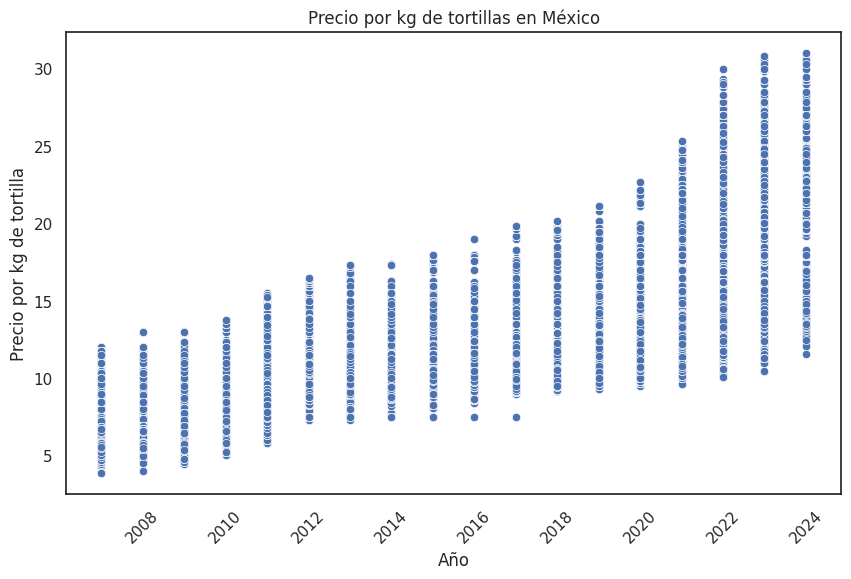

In [ ]:
# Creación de un gráfico de dispersión con nuestra base de datos

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

tar = sns.scatterplot(x=df['Year'], y=df['Price per kilogram'], ax=ax);
plt.xlabel('Año')
plt.ylabel('Precio por kg de tortilla')
plt.title('Precio por kg de tortillas en México')
plt.xticks(rotation=45)


#configurar eje x
tar.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

En esta primera gráfica de dispersión, notamos que los datos se encuentran bastante concentrados en ciertos rangos de precios para cado año, indicando la existencia de homogeneidad en los precios a nivel nacional. Dado que no se observan cantidades grandes de puntos alejados de la tendencia general, podemos decir que los datos son relativamente consistentes.

In [ ]:
# Creación de un objeto K-Means con 4 clusters (agrupación de elementos que comparten características similares) y un máximo de 10000 iteraciones

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4, max_iter=10000)

In [ ]:
# Ajuste del modelo a los datos, utilizando las columnas 'Year' y 'Price per kilogram'
# El algoritmo K-Means se encarga de dividir los datos de precios en 4 grupos de precios similares

k_means.fit(df[['Year', 'Price per kilogram']])

KMeans(max_iter=10000, n_clusters=4)

In [ ]:
# Obtención de los centroides de cada cluster

centers = k_means.cluster_centers_
centers

array([[2014.02735183,   11.56659617],
       [2022.1957197 ,   22.47011288],
       [2019.95626152,   13.51268797],
       [2008.8835725 ,    7.85495954]])

(array([2006., 2008., 2010., 2012., 2014., 2016., 2018., 2020., 2022.,
        2024., 2026.]),
 [Text(2006.0, 0, '2006'),
  Text(2008.0, 0, '2008'),
  Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024'),
  Text(2026.0, 0, '2026')])

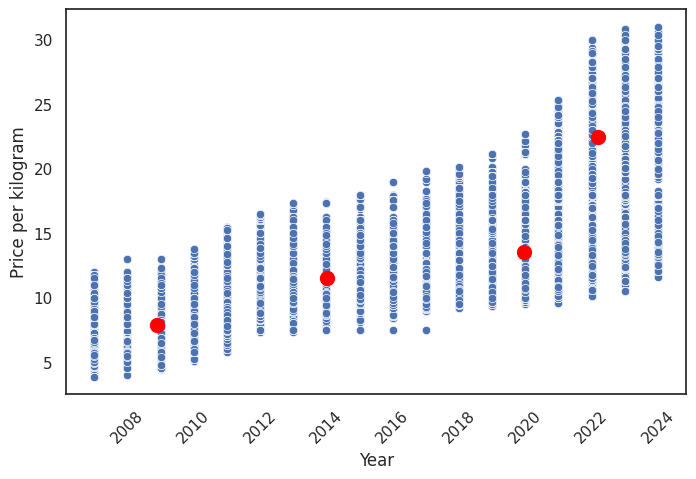

In [ ]:
# Creación de un gráfico de dispersión de los datos originales

fig = plt.figure()
ax = fig.add_subplot()

# Agregamos los centroides al gráfico

ddo =sns.scatterplot(x=df['Year'], y=df['Price per kilogram'], ax=ax);
ax.scatter(centers[:,0], centers[:,1], color='red', s=100);

#configurar eje x
ddo.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xticks(rotation=45)

In [ ]:
# Obtención de las etiquetas de los clusters para cada punto de datos

clasificaciones = k_means.predict(df[['Year', 'Price per kilogram']])
clasificaciones

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

(array([2006., 2008., 2010., 2012., 2014., 2016., 2018., 2020., 2022.,
        2024., 2026.]),
 [Text(2006.0, 0, '2006'),
  Text(2008.0, 0, '2008'),
  Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024'),
  Text(2026.0, 0, '2026')])

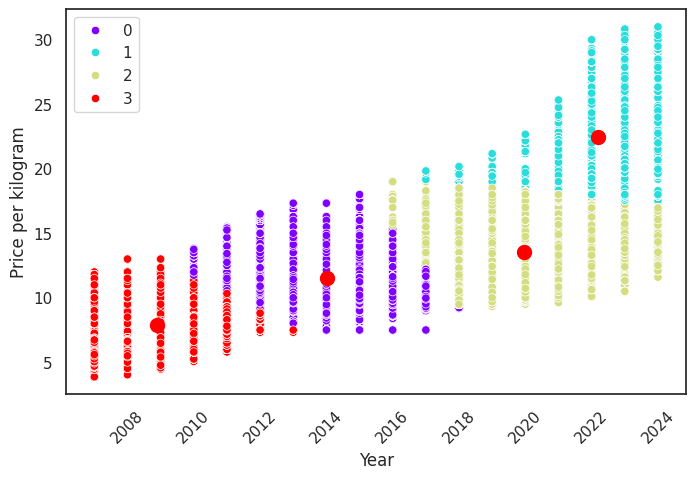

In [ ]:
# Creación de un nuevo gráfico de dispersión, coloreando los puntos según su cluster

fig = plt.figure()
ax = fig.add_subplot()
dcc= sns.scatterplot(x=df['Year'], y=df['Price per kilogram'], ax=ax, hue=clasificaciones, palette='rainbow');

# Se agregan los centroides al gráfico

ax.scatter(centers[:,0], centers[:,1], color='red', s=100);
#configurar eje x
dcc.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xticks(rotation=45)

**Análisis:**

*Clasificación no supervisada: El algoritmo K-Means agrupó los datos en 4 clusters, lo que permite visualizar grupos de precios de la tortilla a lo largo del tiempo, esto ayuda a identificar patrones y tendencias en los precios sin tener una clasificación previa.*

## *Clasificación supervisada: Regresión Logística*

*La regresión logística sirve para resolver problemas de clasificación binaria supervisada. ¿Qué significa eso? Binario significa que los datos pueden ser clasificados solamente en dos categorías: positivo y negativo (sí y no; 0 y 1). Supervisado, a diferencia de la clasificación no supervisada, significa que sabemos exactamente cuáles son las dos categorías en las que se quieren agrupar los datos, y que además se tiene un conjunto de datos de entrenamiento que ha sido clasificado de antemano.*

*En la clasificación supervisada es necesario entrenar a nuestro modelo con un conjunto de datos que ha sido etiquetado de antemano. En el conjunto de datos de entrenamiento se necesita una variable dependiente binaria que sea la clasificación que se quiere que el modelo aprenda a realizar.*

In [ ]:
df.head()

State            City  Year  Month  Day         Store type  \
0       Aguascalientes  Aguascalientes  2007      1   10  Mom and Pop Store   
2      Baja California         Tijuana  2007      1   10  Mom and Pop Store   
3  Baja California Sur          La Paz  2007      1   10  Mom and Pop Store   
4             Campeche        Campeche  2007      1   10  Mom and Pop Store   
5             Coahuila  Piedras Negras  2007      1   10  Mom and Pop Store   

   Price per kilogram  
0                 9.9  
2                10.0  
3                10.0  
4                10.0  
5                10.0

In [ ]:
df['Store type'].value_counts()

Store type
Mom and Pop Store    139716
Big Retail Store     138287
Name: count, dtype: int64

In [ ]:
# Realizamos un mapeo de manera que, si el tipo de tienda sea "Mom and Pop Store", este valor sea reemplazado por "1";
# por otro lado, si el tipo de tienda es "Big Retail Store", este valor será reemplazado por "0".

df['Store type'] = df['Store type'].map({'Mom and Pop Store': 1, 'Big Retail Store': 0})

In [ ]:
# Se seleccionan todas las columnas excepto 'Store type', 'State' y 'City' como características (X)
# y se asigna la columna 'Store type' como variable objetivo (y)

X = df.drop(columns=['Store type','State', 'City'])
y = df['Store type']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Se divide el conjunto de datos en conjuntos de entrenamiento y prueba
# con una proporción de 70% para entrenamiento y 30% para prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Se crea un modelo de regresión logística con un máximo de 10000 iteraciones

logreg = LogisticRegression(max_iter=10000)

**Análisis:**

*Clasificación no supervisada: El algoritmo K-Means agrupó los datos en 4 clusters, lo que permite visualizar grupos de precios de la tortilla a lo largo del tiempo, esto ayuda a identificar patrones y tendencias en los precios sin tener una clasificación previa.*

## *Clasificación supervisada: Regresión Logística*

*La regresión logística sirve para resolver problemas de clasificación binaria supervisada. ¿Qué significa eso? Binario significa que los datos pueden ser clasificados solamente en dos categorías: positivo y negativo (sí y no; 0 y 1). Supervisado, a diferencia de la clasificación no supervisada, significa que sabemos exactamente cuáles son las dos categorías en las que se quieren agrupar los datos, y que además se tiene un conjunto de datos de entrenamiento que ha sido clasificado de antemano.*

*En la clasificación supervisada es necesario entrenar a nuestro modelo con un conjunto de datos que ha sido etiquetado de antemano. En el conjunto de datos de entrenamiento se necesita una variable dependiente binaria que sea la clasificación que se quiere que el modelo aprenda a realizar.*

In [ ]:
df.head()

State            City  Year  Month  Day  Store type  \
0       Aguascalientes  Aguascalientes  2007      1   10           1   
2      Baja California         Tijuana  2007      1   10           1   
3  Baja California Sur          La Paz  2007      1   10           1   
4             Campeche        Campeche  2007      1   10           1   
5             Coahuila  Piedras Negras  2007      1   10           1   

   Price per kilogram  
0                 9.9  
2                10.0  
3                10.0  
4                10.0  
5                10.0

In [ ]:
df['Store type'].value_counts()

Store type
1    139716
0    138287
Name: count, dtype: int64

In [ ]:
# Realizamos un mapeo de manera que, si el tipo de tienda sea "Mom and Pop Store", este valor sea reemplazado por "1";
# por otro lado, si el tipo de tienda es "Big Retail Store", este valor será reemplazado por "0".

df['Store type'] = df['Store type'].map({'Mom and Pop Store': 1, 'Big Retail Store': 0})
df =df.dropna(subset=['Price per kilogram'])
df = df.reset_index(drop=True)

In [ ]:
# Se seleccionan todas las columnas excepto 'Store type', 'State' y 'City' como características (X)
# y se asigna la columna 'Store type' como variable objetivo (y)

X = df.drop(columns=['Store type','State', 'City'])
y = df['Store type']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Se divide el conjunto de datos en conjuntos de entrenamiento y prueba
# con una proporción de 70% para entrenamiento y 30% para prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Se crea un modelo de regresión logística con un máximo de 10000 iteraciones

logreg = LogisticRegression(max_iter=10000)

In [ ]:
# Se entrena el modelo de regresión logística utilizando los datos de entrenamiento

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Se utilizan los datos de prueba para hacer predicciones con el modelo entrenado

y_pred = logreg.predict(X_test)

In [ ]:
# El mínimo es 0 y el máximo es 1

# La medida de evaluación que estamos usando ahorita es la "mean_accuracy" o exactitud promedio
logreg.score(X_test, y_test)

0.912039423987722

In [ ]:
from sklearn import metrics
import numpy as np
# Se utilizan los datos de prueba para hacer predicciones con el modelo entrenado
# y se imprimen las predicciones resultantes

y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
# Se calcula la matriz de confusión para evaluar el rendimiento del modelo
# comparando las predicciones con las etiquetas reales

confussion_matrix = metrics.confusion_matrix(y_test, y_pred)
confussion_matrix

array([[38276,  3174],
       [ 4162, 37789]])

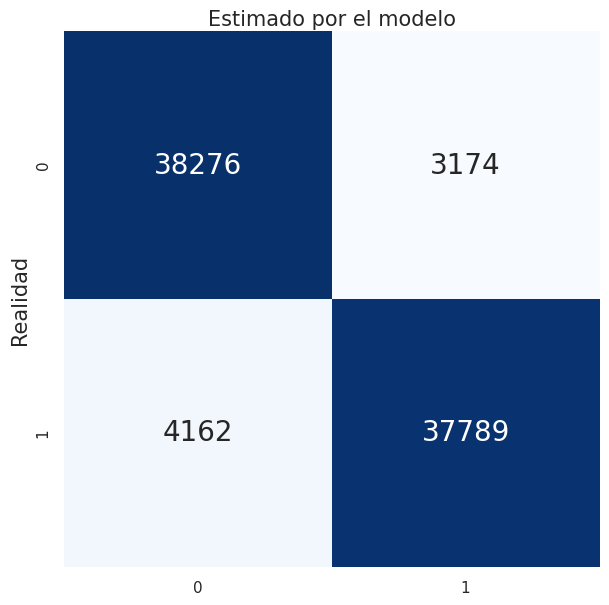

In [ ]:
# Se definen los nombres de las clases (0 y 1)
class_names = [0, 1]

# Se crea una figura y un eje para el gráfico
fig, ax = plt.subplots(figsize=(6, 6))

# Se configuran las etiquetas en los ejes x e y
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Se crea un mapa de calor para visualizar la matriz de confusión
sns.heatmap(pd.DataFrame(confussion_matrix), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size": 20})

# Se coloca la etiqueta del eje x en la parte superior
ax.xaxis.set_label_position("top")

# Se ajusta el diseño del gráfico
plt.tight_layout()

# Se agregan etiquetas a los ejes
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
# Se extraen los valores individuales de la matriz de confusión
# tn: True Negative
# fp: False Positive
# fn: False Negative
# tp: True Positive

tn, fp, fn, tp = confussion_matrix.ravel()

In [ ]:
# Exactitud
metrics.accuracy_score(y_test, y_pred)

0.912039423987722

In [ ]:
# Precision
metrics.precision_score(y_test, y_pred)

0.9225154407636159

In [ ]:
# Sensibilidad
metrics.recall_score(y_test, y_pred)

0.9007890157564777

In [ ]:
# Especifidad
tn / (tn + fp)

0.9234258142340169

In [ ]:
# Se calcula el recall para la clase negativa (0)
metrics.recall_score(y_test, y_pred, pos_label=0)

0.9234258142340169

In [ ]:
# Curva ROC/AUC
from sklearn.metrics import roc_curve, auc

In [ ]:
# False Positive Rate = Tasa de Positivos Falsos
# True Positive Rate = Tasa de Positivos Verdaderos

fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_value = auc(fpr, tpr)

auc_value

0.9121074149952473

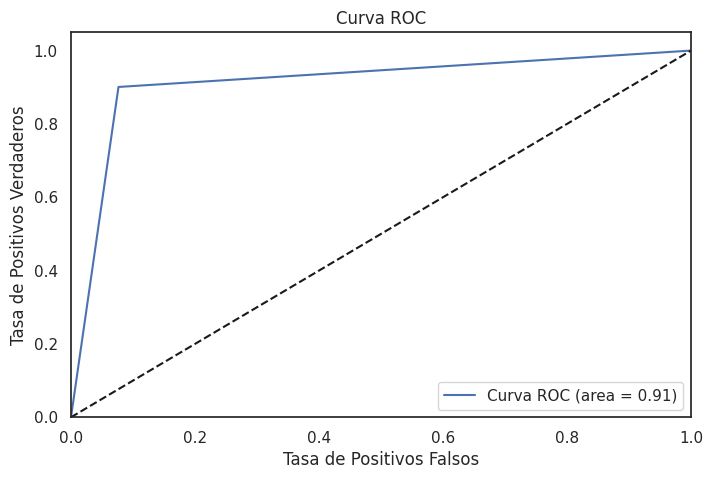

In [ ]:
# Crea una nueva figura para el gráfico.
plt.figure()

# Traza la curva ROC, donde:
# - fpr: Tasa de falsos positivos (False Positive Rate)
# - tpr: Tasa de verdaderos positivos (True Positive Rate)
# La etiqueta indica el área bajo la curva ROC (AUC), que es una medida del rendimiento del modelo.
plt.plot(fpr, tpr, label='Curva ROC (area = %0.2f)' % auc_value)

# Traza una línea diagonal desde el punto (0,0) hasta (1,1). Esta línea representa el rendimiento de un clasificador aleatorio.
plt.plot([0, 1], [0, 1], 'k--')

# Establece los límites del eje x entre 0 y 1 para la tasa de falsos positivos.
plt.xlim([0.0, 1.0])

# Establece los límites del eje y entre 0 y 1.05 para la tasa de verdaderos positivos.
plt.ylim([0.0, 1.05])

# Agrega una etiqueta al eje x para indicar la tasa de falsos positivos.
plt.xlabel('Tasa de Positivos Falsos')

# Agrega una etiqueta al eje y para indicar la tasa de verdaderos positivos.
plt.ylabel('Tasa de Positivos Verdaderos')

# Agrega un título al gráfico para indicar que se trata de una curva ROC.
plt.title('Curva ROC')

# Agrega una leyenda en la esquina inferior derecha para mostrar la etiqueta de la curva ROC.
plt.legend(loc="lower right")